In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Q1. Identify the months with the highest and lowest acquisition rates. What strategies could be implemented to address the fluctuations and ensure consistent growth throughout the year?


In [95]:
#dataset initialization and some light pre-processing:

sales = pd.read_csv('data/Online_Sales.csv')
columns = sales.columns
columns = [str.lower(column) for column in columns]
sales.columns = columns

#change transaction_date to pd.datetime:

sales['transaction_date'] = pd.to_datetime(sales['transaction_date'])
sales.head()

,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [96]:
df = sales.loc[:,['customerid' , 'transaction_date']]
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['month'] = pd.to_datetime(df['transaction_date']).dt.month_name()
df['mnum'] = pd.to_datetime(df['transaction_date']).dt.month
df

,customerid,transaction_date,month,mnum
0,17850,2019-01-01,January,1
1,17850,2019-01-01,January,1
2,17850,2019-01-01,January,1
3,17850,2019-01-01,January,1
4,17850,2019-01-01,January,1
...,...,...,...,...
52919,14410,2019-12-31,December,12
52920,14410,2019-12-31,December,12
52921,14410,2019-12-31,December,12
52922,14600,2019-12-31,December,12


In [97]:
#get first transaction
ftransactions = df.groupby('customerid')['transaction_date'].agg('min').reset_index()
#extract month from transaction_date

ftransactions.rename(columns = {'transaction_date':'first_transaction_date'} , inplace = True)
ftransactions['fmonth'] = ftransactions['first_transaction_date'].dt.month
ftransactions['month'] = ftransactions['first_transaction_date'].dt.month_name()
ftransactions

#group by month

acqs = ftransactions.groupby('month').agg({'customerid':'nunique' , 'fmonth':'first'}).reset_index().sort_values(by = 'fmonth').rename(columns={'customerid':'acquisitions', 'fmonth':'nmonth'}).reset_index(drop=True)

acqs

,month,acquisitions,nmonth
0,January,215,1
1,February,96,2
2,March,177,3
3,April,163,4
4,May,112,5
5,June,137,6
6,July,94,7
7,August,135,8
8,September,78,9
9,October,87,10


Highest customer acquisition month -> January(215)

Lowest customer acquisition month -> November(68)


### Q2. Analyze the data to determine if certain months consistently show higher or lower acquisition rates. How can the company capitalize on high-performing months and improve performance during slower periods?


In [98]:
acqs
# plt.plot(acqs['month'] , acqs['acquisitions'])
# print(acqs.dtypes)
# print(type(acqs['month'].iloc[0]))
# print(type(acqs['acquisitions'].iloc[0]))

,month,acquisitions,nmonth
0,January,215,1
1,February,96,2
2,March,177,3
3,April,163,4
4,May,112,5
5,June,137,6
6,July,94,7
7,August,135,8
8,September,78,9
9,October,87,10


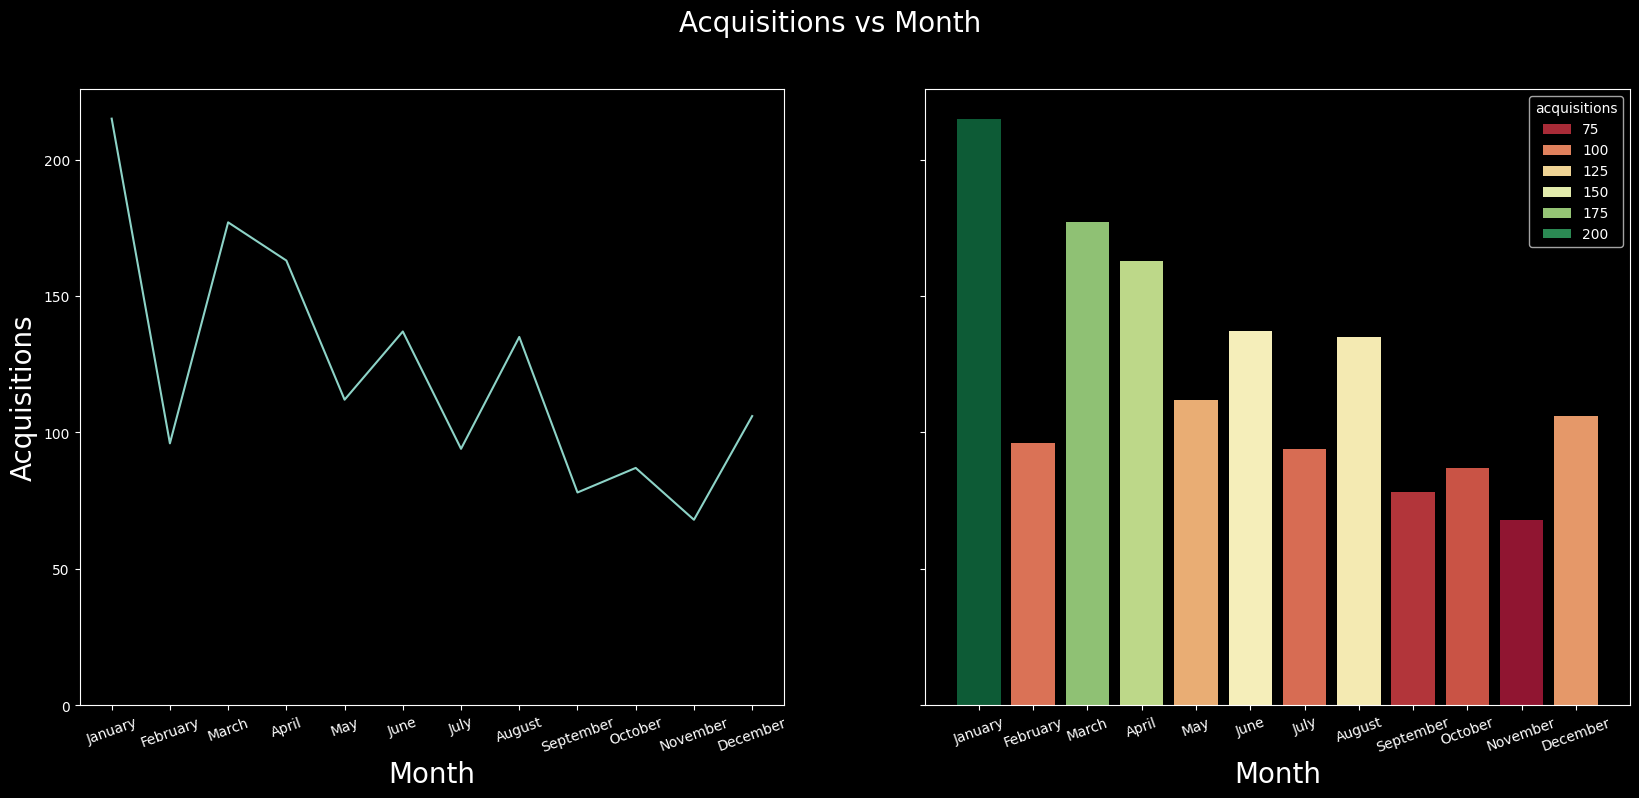

In [155]:
#accusitations throughout the year:
fig , axes = plt.subplots(1,2 , figsize = (20,8) , sharey = True)
plt.sca(axes[0])
sns.lineplot(acqs , x = 'month' , y = 'acquisitions')
plt.xticks(rotation = 20)
plt.ylabel('Acquisitions' , fontsize = 20)
plt.xlabel('Month' , fontsize = 20)
plt.plot()

plt.sca(axes[1])
sns.barplot(acqs , x = 'month' , y = 'acquisitions' , hue = 'acquisitions' , palette='RdYlGn')
plt.xticks(rotation = 20)
plt.xlabel('Month' , fontsize = 20)
plt.ylabel('Acquisitions' , fontsize = 20)
plt.plot()
fig.suptitle('Acquisitions vs Month' , fontsize = 20)
plt.savefig('./images/q2.png')

### Q3. Identify periods with the strongest and weakest retention rates. What strategies could be implemented to improve retention during weaker months?


In [100]:
fdf = ftransactions.loc[:,['customerid' , 'first_transaction_date']]
# fdf

mdf = pd.merge(df , fdf)
repeateddf = mdf[mdf['transaction_date'] > mdf['first_transaction_date']]
repeateddf['fmonth'] = repeateddf['first_transaction_date'].dt.month_name()
repeateddf['fmonthnum'] = repeateddf['first_transaction_date'].dt.month


ret = repeateddf.groupby('month').agg({'customerid':'nunique' , 'mnum' : 'first'}).sort_values(by = 'mnum').reset_index()
ret.rename(columns = {'customerid':'retentions'} , inplace = True)
ret

/var/folders/5f/scjcfk_97_n7zmjltnpm2mjc0000gn/T/ipykernel_90481/4020386928.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeateddf['fmonth'] = repeateddf['first_transaction_date'].dt.month_name()
/var/folders/5f/scjcfk_97_n7zmjltnpm2mjc0000gn/T/ipykernel_90481/4020386928.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeateddf['fmonthnum'] = repeateddf['first_transaction_date'].dt.month


,month,retentions,mnum
0,January,39,1
1,February,40,2
2,March,64,3
3,April,91,4
4,May,111,5
5,June,137,6
6,July,160,7
7,August,185,8
8,September,128,9
9,October,143,10


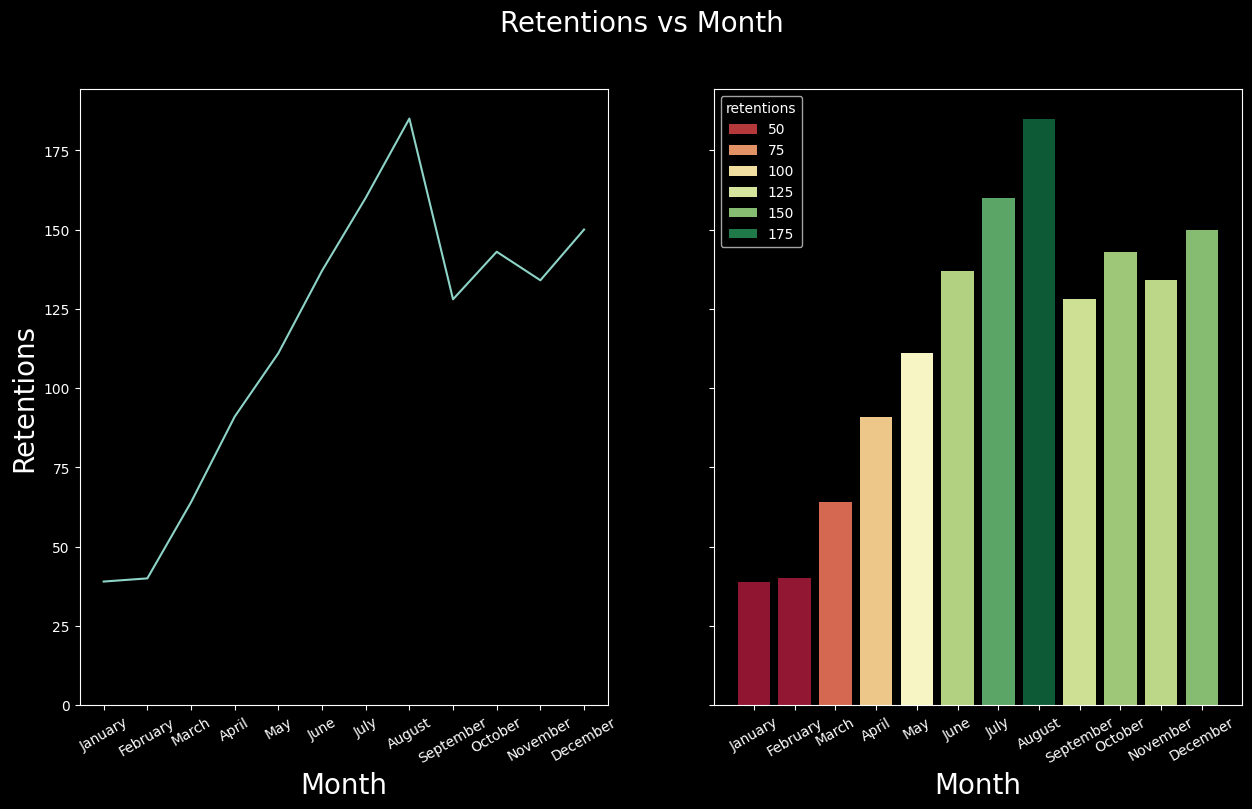

In [151]:
fig , axes = plt.subplots(1, 2, figsize = (15 , 8) , sharey = True)

plt.sca(axes[0])
sns.lineplot(ret , x = 'month' , y = 'retentions')
plt.xticks(rotation = 30)
plt.ylabel('Retentions' , fontsize = 20)
plt.xlabel('Month' , fontsize = 20)
plt.plot()

plt.sca(axes[1])
sns.barplot(ret , x = 'month' , y = 'retentions' , hue = 'retentions' , palette='RdYlGn')
plt.xticks(rotation = 30)
plt.ylabel('Retentions' , fontsize = 20)
plt.xlabel('Month' , fontsize = 20)
fig.suptitle('Retentions vs Month' , fontsize = 20)
plt.plot()
plt.savefig('./images/q3.png')

In [102]:
customers = pd.read_excel('data/CustomersData.xlsx')
customers.columns = [str.lower(column) for column in customers.columns]
customers

,customerid,gender,location,tenure_months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49
...,...,...,...,...
1463,14438,F,New York,41
1464,12956,F,Chicago,48
1465,15781,M,New Jersey,19
1466,14410,F,New York,45


In [103]:
ftransactions

,customerid,first_transaction_date,fmonth,month
0,12346,2019-09-15,9,September
1,12347,2019-03-24,3,March
2,12348,2019-06-22,6,June
3,12350,2019-12-14,12,December
4,12356,2019-09-15,9,September
...,...,...,...,...
1463,18259,2019-04-05,4,April
1464,18260,2019-06-22,6,June
1465,18269,2019-04-05,4,April
1466,18277,2019-10-23,10,October


In [104]:
cdf = pd.merge(repeateddf , customers , on = 'customerid')
cdf

,customerid,transaction_date,month,mnum,first_transaction_date,fmonth,fmonthnum,gender,location,tenure_months
0,14688,2019-01-02,January,1,2019-01-01,January,1,F,New York,46
1,14688,2019-01-02,January,1,2019-01-01,January,1,F,New York,46
2,14688,2019-01-02,January,1,2019-01-01,January,1,F,New York,46
3,14688,2019-01-02,January,1,2019-01-01,January,1,F,New York,46
4,14688,2019-01-02,January,1,2019-01-01,January,1,F,New York,46
...,...,...,...,...,...,...,...,...,...,...
26958,14606,2019-12-31,December,12,2019-01-16,January,1,F,Chicago,33
26959,14606,2019-12-31,December,12,2019-01-16,January,1,F,Chicago,33
26960,14606,2019-12-31,December,12,2019-01-16,January,1,F,Chicago,33
26961,14606,2019-12-31,December,12,2019-01-16,January,1,F,Chicago,33


In [105]:
repeatedLocations = cdf.groupby('month').agg({'location':'value_counts'}).rename(columns = {'location':'lfreq'}).reset_index()
locations = pd.merge(repeatedLocations , ret , left_on='month' , right_on='month').sort_values(by = 'mnum')
locations.head()

,month,location,lfreq,retentions,mnum
24,January,Washington DC,39,39,1
23,January,New Jersey,68,39,1
22,January,New York,78,39,1
21,January,California,246,39,1
20,January,Chicago,323,39,1


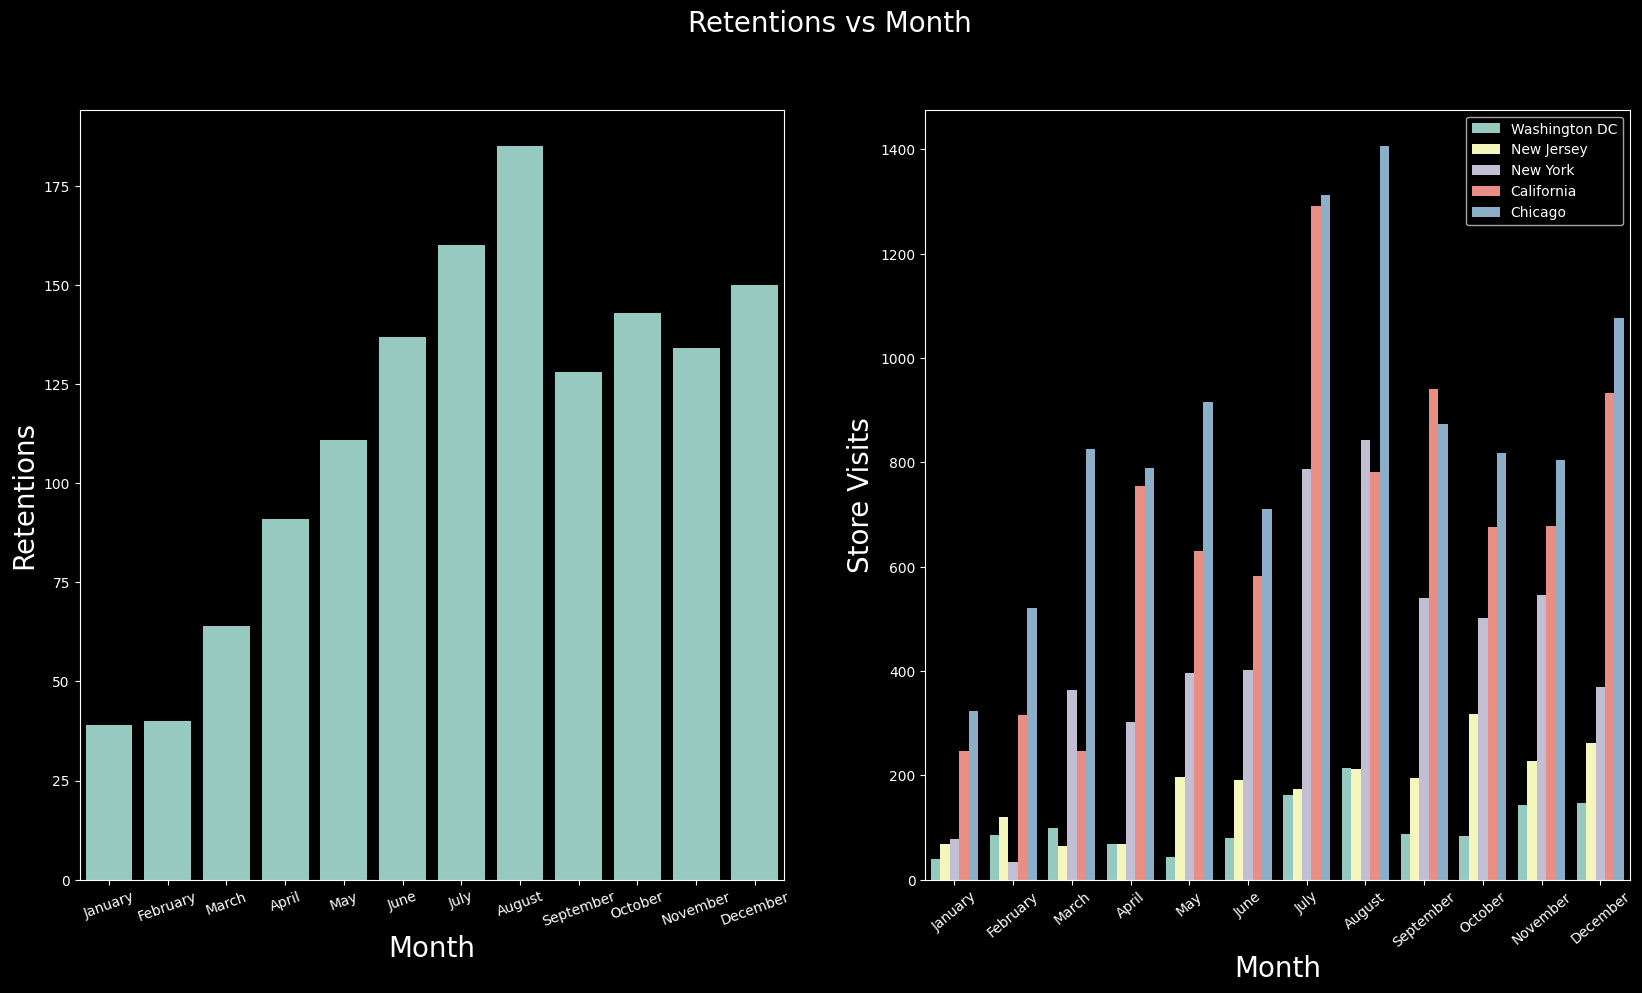

In [149]:
fig , axes = plt.subplots(1, 2, figsize = (20 , 10))
plt.sca(axes[0])
sns.barplot(locations , x = 'month' , y = 'retentions')
plt.xticks(rotation = 20)
plt.xlabel('Month' , fontsize = 20)
plt.ylabel('Retentions' , fontsize = 20)
fig.suptitle('Retentions vs Month' , fontsize = 20)


plt.sca(axes[1])
sns.barplot(locations , x = 'month' , y = 'lfreq' , hue = 'location')
plt.xticks(rotation = 40)
plt.xlabel('Month' , fontsize = 20)
plt.ylabel('Store Visits' , fontsize = 20)
plt.legend()

plt.savefig('./images/q4.png')

In [107]:
coupons = pd.read_csv('./data/Discount_Coupon.csv')
coupons.columns = [str.lower(column) for column in coupons.columns]
coupons.head()

,month,product_category,coupon_code,discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [108]:
# convert short form of months to long
months = coupons['month']
coupons['month'] = pd.to_datetime(months , format = '%b').dt.month_name()
coupons.head()

,month,product_category,coupon_code,discount_pct
0,January,Apparel,SALE10,10
1,February,Apparel,SALE20,20
2,March,Apparel,SALE30,30
3,January,Nest-USA,ELEC10,10
4,February,Nest-USA,ELEC20,20


In [109]:
mdf = locations.merge(coupons , on = 'month' , how = 'left')
mdf.head()

,month,location,lfreq,retentions,mnum,product_category,coupon_code,discount_pct
0,January,Washington DC,39,39,1,Apparel,SALE10,10
1,January,Washington DC,39,39,1,Nest-USA,ELEC10,10
2,January,Washington DC,39,39,1,Office,OFF10,10
3,January,Washington DC,39,39,1,Drinkware,EXTRA10,10
4,January,Washington DC,39,39,1,Lifestyle,EXTRA10,10


In [110]:
gdf = mdf.groupby('month').agg({'discount_pct':'mean' , 'retentions':'max' ,'mnum':'first'}).reset_index().sort_values(by='mnum')
gdf

,month,discount_pct,retentions,mnum
4,January,10.0,39,1
3,February,20.0,40,2
7,March,30.0,64,3
0,April,10.0,91,4
8,May,20.0,111,5
6,June,30.0,137,6
5,July,10.0,160,7
1,August,20.0,185,8
11,September,30.0,128,9
10,October,10.0,143,10


[]

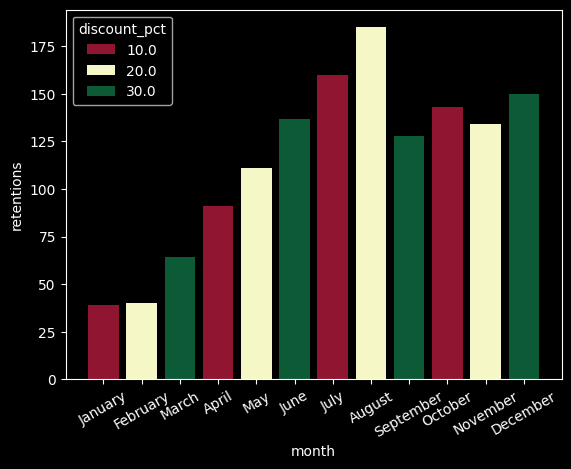

In [111]:
sns.barplot(gdf , x = 'month' , y = 'retentions' , hue = 'discount_pct' , palette='RdYlGn')
plt.xticks(rotation = 30)
plt.plot()

### Q5. Compare the revenue generated by new and existing customers month-over-month. What does this trend suggest about the balance between acquisition and retention efforts?


In [112]:
#get revenue generated by first purchases
purchases = pd.read_csv('./data/Online_Sales.csv')
purchases.columns = [str.lower(column) for column in purchases.columns]
purchases['transaction_date'] = pd.to_datetime(purchases['transaction_date'])
purchases['mnum'] = purchases['transaction_date'].dt.month
purchases['month'] = purchases['transaction_date'].dt.month_name()
purchases['revenue'] = purchases['avg_price'] * purchases['quantity']
purchases.head()


,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,mnum,month,revenue
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,1,January,2.05
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,1,January,87.65
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,1,January,16.50


In [113]:
# group by customers to get first and later purchases by each customer

gdf = purchases.groupby('customerid').agg({'transaction_date':'first'}).reset_index().rename(columns = 
{'transaction_date':'first_transaction_date'}).merge(purchases , on = 'customerid' , how = 'right')
gdf.head()

,customerid,first_transaction_date,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,mnum,month,revenue
0,17850,2019-01-01,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
1,17850,2019-01-01,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
2,17850,2019-01-01,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,1,January,2.05
3,17850,2019-01-01,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,1,January,87.65
4,17850,2019-01-01,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,1,January,16.50


In [114]:
first_purchases = gdf[gdf['transaction_date'] == gdf['first_transaction_date']]
first_purchases.head()

,customerid,first_transaction_date,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,mnum,month,revenue
0,17850,2019-01-01,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
1,17850,2019-01-01,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
2,17850,2019-01-01,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,1,January,2.05
3,17850,2019-01-01,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,1,January,87.65
4,17850,2019-01-01,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,1,January,16.50


In [115]:
monthly_first_purchases = first_purchases.groupby('month').agg({'revenue':'sum' , 'mnum':'first'}).sort_values(by = 'mnum')
monthly_first_purchases

,revenue,mnum
month,,
January,323744.46,1
February,200818.93,2
March,234593.76,3
April,172152.33,4
May,153077.16,5
June,172170.63,6
July,103836.55,7
August,167440.86,8
September,132004.07,9


In [116]:
repeated_purchses = gdf[gdf['transaction_date'] > gdf['first_transaction_date']]
repeated_purchses.head()

,customerid,first_transaction_date,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,mnum,month,revenue
89,14688,2019-01-01,16737,2019-01-02,GGOEGHPJ080110,Google 5-Panel Cap,Headgear,2,19.59,6.5,Clicked,1,January,39.18
90,14688,2019-01-01,16738,2019-01-02,GGOEAKDH019899,Windup Android,Lifestyle,2,3.29,6.5,Clicked,1,January,6.58
91,14688,2019-01-01,16739,2019-01-02,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,1,122.77,6.5,Not Used,1,January,122.77
92,14688,2019-01-01,16740,2019-01-02,GGOENEBJ081899,Nest Learning Thermostat 3rd Gen - CA - Stainl...,Nest-Canada,1,205.30,8.7,Used,1,January,205.30
93,14688,2019-01-01,16740,2019-01-02,GGOENEBQ081699,Nest Protect Smoke + CO White Battery Alarm - CA,Nest-Canada,3,107.29,8.7,Clicked,1,January,321.87


In [117]:
monthly_repeated_purchases = repeated_purchses.groupby('month').agg({'revenue':'sum' , 'mnum':'first'}).sort_values(by = 'mnum')
monthly_repeated_purchases

,revenue,mnum
month,,
January,79880.12,1
February,110000.87,2
March,115014.33,3
April,229466.09,4
May,154686.26,5
June,148910.75,6
July,268801.52,7
August,233769.51,8
September,228544.33,9


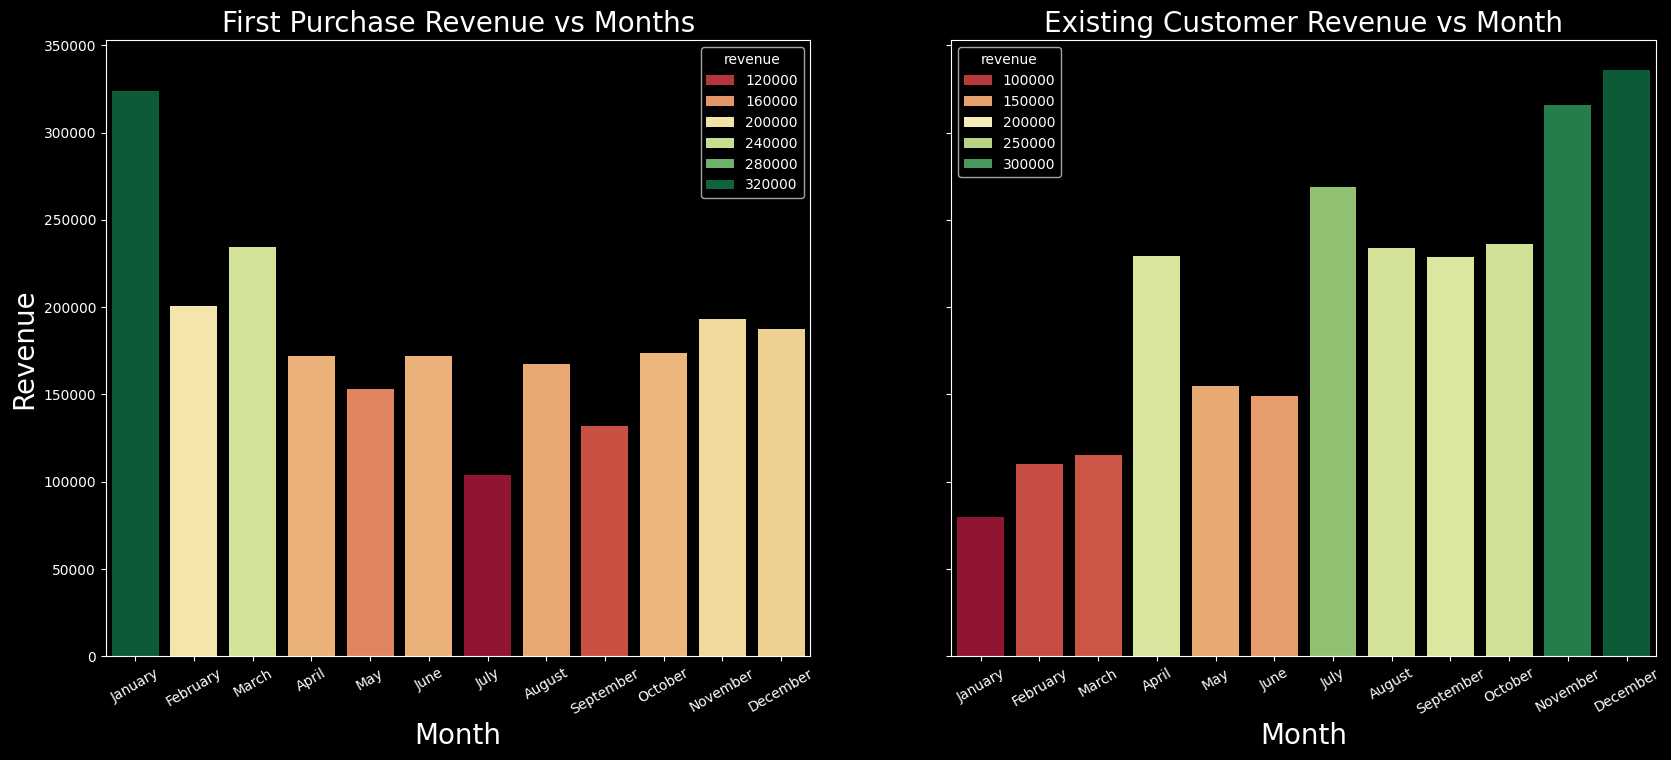

In [148]:
fig , axes = plt.subplots(1,2 , figsize = (20,8) , sharey=True)
plt.sca(axes[0])
sns.barplot(monthly_first_purchases , x = 'month' , y = 'revenue' , hue = 'revenue' , palette= 'RdYlGn')
plt.xticks(rotation = 30)
plt.xlabel('Month' , fontsize = 20)
plt.ylabel('Revenue' , fontsize = 20)
plt.title('First Purchase Revenue vs Months' , fontsize = 20)
# plt.show()

plt.sca(axes[1])
sns.barplot(monthly_repeated_purchases , x = 'month' , y = 'revenue' , hue = 'revenue' , palette= 'RdYlGn')
plt.xticks(rotation = 30)
plt.xlabel('Month' , fontsize = 20)
plt.ylabel('Revenue' , fontsize = 20)
plt.title('Existing Customer Revenue vs Month' , fontsize = 20)
# plt.show()
plt.savefig('images/q5.png')


In [81]:
monthly_repeated_purchases.head()
monthly_first_purchases.head()

,revenue,mnum
month,,
January,323744.46,1
February,200818.93,2
March,234593.76,3
April,172152.33,4
May,153077.16,5


ValueError: 'neon' is not a valid value for color: supported inputs are (r, g, b) and (r, g, b, a) 0-1 float tuples; '#rrggbb', '#rrggbbaa', '#rgb', '#rgba' strings; named color strings; string reprs of 0-1 floats for grayscale values; 'C0', 'C1', ... strings for colors of the color cycle; and pairs combining one of the above with an alpha value

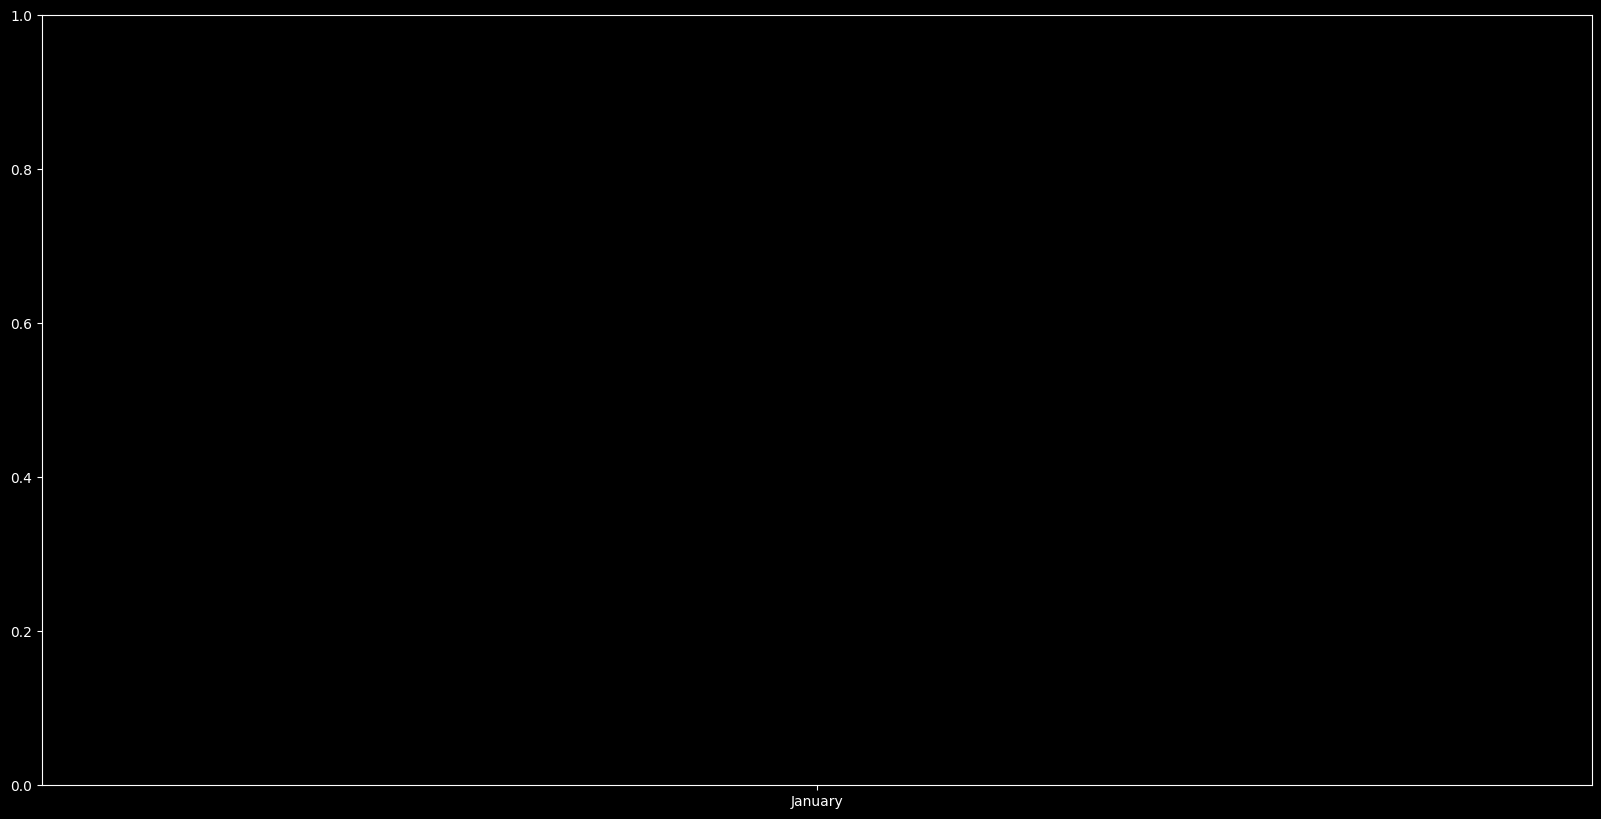

In [ ]:
# plt.style.use('dark_background')
plt.figure(figsize=(20,10))
sns.lineplot(monthly_first_purchases , x = 'month' , y = 'revenue' , label = 'First Time Customers' , color = 'pink')
plt.plot(monthly_repeated_purchases.index , monthly_repeated_purchases['revenue'] , label = 'Repeated Customers' , color = 'green')
plt.xticks(rotation = 40)
plt.legend()
plt.title('Revenue vs Month for different customers.' , fontsize = 20)
plt.xlabel('Month', fontsize = 20)
plt.ylabel('Revenue' , fontsize = 20)
# plt.grid()
# plt.show()
plt.savefig('./images/q5.2.png')

### Q.6 Analyze the relationship between coupon usage and revenue generation. How can discount strategies be optimized to maximize revenue while maintaining profitability?


In [43]:
purchases.head()

,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,mnum,month,revenue
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,1,January,2.05
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,1,January,87.65
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,1,January,16.50


In [44]:
monthly_revenue = purchases.groupby('month').agg({'revenue':'sum' , 'mnum':'first'}).reset_index().sort_values(by='mnum')
monthly_revenue

,month,revenue,mnum
4,January,403624.58,1
3,February,310819.80,2
7,March,349608.09,3
0,April,401618.42,4
8,May,307763.42,5
6,June,321081.38,6
5,July,372638.07,7
1,August,401210.37,8
11,September,360548.40,9
10,October,409681.28,10


In [45]:
monthly_coupons = purchases.groupby('month').agg({'coupon_status':'value_counts'}).rename(columns={'coupon_status':'count'})
monthly_coupons.reset_index(inplace=True)
monthly_coupons['mnum'] = pd.to_datetime(monthly_coupons['month'] , format = '%B').dt.month
monthly_coupons.sort_values(by = 'mnum' , inplace=True)
monthly_coupons.head()

,month,coupon_status,count,mnum
14,January,Not Used,605,1
13,January,Used,1383,1
12,January,Clicked,2075,1
11,February,Not Used,511,2
10,February,Used,1098,2


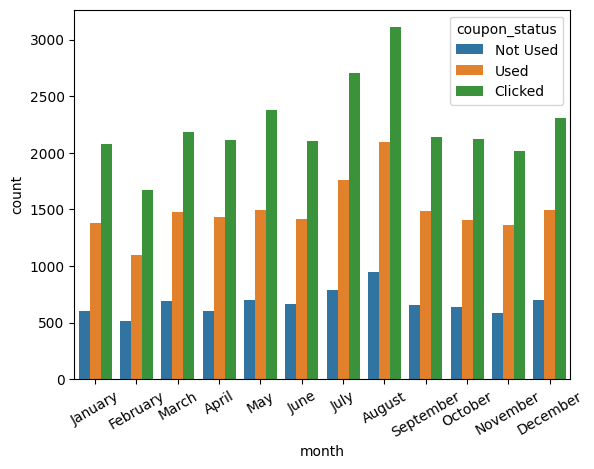

In [46]:
sns.barplot(monthly_coupons , x = 'month' , y = 'count' , hue = 'coupon_status')
plt.xticks(rotation = 30)
plt.show()

In [47]:
cgdf = purchases.groupby('coupon_status').agg({'revenue':'sum'})
cgdf

,revenue
coupon_status,
Clicked,2377266.65
Not Used,732709.87
Used,1560818.10


Text(0.5, 1.0, 'Revenue vs Coupon_Status')

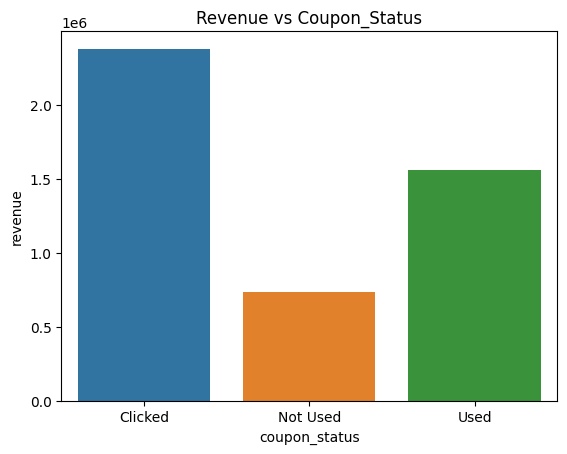

In [48]:
sns.barplot(cgdf , x = 'coupon_status' , y = 'revenue' , hue = 'coupon_status')
plt.title('Revenue vs Coupon_Status')

### Q.7 Identify the top-performing products and analyze the factors driving their success.


In [49]:
products = purchases.groupby('product_sku').agg({'revenue':'sum' , 'quantity':'sum', 'product_description':'first', 'avg_price':'first' , 'product_category':'first'}).sort_values(by=['revenue' , 'quantity'] , ascending=False)
products

,revenue,quantity,product_description,avg_price,product_category
product_sku,,,,,
GGOENEBJ079499,688916.34,4570,Nest Learning Thermostat 3rd Gen-USA - Stainle...,153.71,Nest-USA
GGOENEBQ078999,629977.12,5206,Nest Cam Outdoor Security Camera - USA,122.77,Nest-USA
GGOENEBB078899,528612.93,4402,Nest Cam Indoor Security Camera - USA,122.77,Nest-USA
GGOENEBQ079099,213819.16,2683,Nest Protect Smoke + CO White Battery Alarm-USA,81.50,Nest-USA
GGOENEBQ079199,212495.57,2670,Nest Protect Smoke + CO White Wired Alarm-USA,81.50,Nest-USA
...,...,...,...,...,...
GGOEGAXH065355,9.51,1,Google Toddler Short Sleeve T-shirt Green,9.51,Apparel
GGOEYAEJ029616,9.49,1,YouTube Women's Short Sleeve Tri-blend Badge T...,9.49,Apparel
GGOEGALL074617,7.65,2,Google Women's Short Sleeve Badge Tee Navy,3.40,Apparel


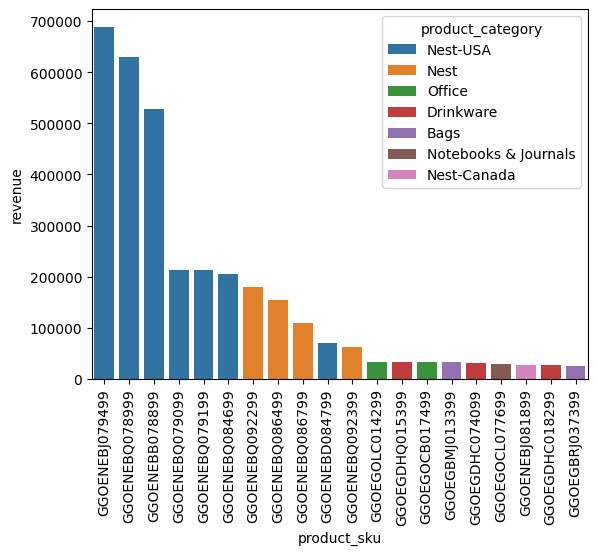

In [50]:
sns.barplot(products.head(20) , x = 'product_sku' , y = 'revenue' , hue = 'product_category')
plt.xticks(rotation = 90)
plt.show()

### Q.8 Analyze the relationship between monthly marketing spend and revenue. Are there any months where marketing efforts yielded disproportionately high or low returns? How can marketing strategies be adjusted to improve ROI?


In [51]:
monthly_revenue

,month,revenue,mnum
4,January,403624.58,1
3,February,310819.80,2
7,March,349608.09,3
0,April,401618.42,4
8,May,307763.42,5
6,June,321081.38,6
5,July,372638.07,7
1,August,401210.37,8
11,September,360548.40,9
10,October,409681.28,10


In [52]:
marketing = pd.read_csv('./data/Marketing_Spend.csv')
marketing.columns = [str.lower(column) for column in marketing.columns]
marketing['date'] = pd.to_datetime(marketing.date)
marketing['month'] = marketing['date'].dt.month_name()
marketing['mnum'] = marketing['date'].dt.month
marketing['spend'] = marketing['online_spend'] + marketing['offline_spend']
marketing

,date,offline_spend,online_spend,month,mnum,spend
0,2019-01-01,4500,2424.50,January,1,6924.50
1,2019-01-02,4500,3480.36,January,1,7980.36
2,2019-01-03,4500,1576.38,January,1,6076.38
3,2019-01-04,4500,2928.55,January,1,7428.55
4,2019-01-05,4500,4055.30,January,1,8555.30
...,...,...,...,...,...,...
360,2019-12-27,4000,3396.87,December,12,7396.87
361,2019-12-28,4000,3246.84,December,12,7246.84
362,2019-12-29,4000,2546.58,December,12,6546.58
363,2019-12-30,4000,674.31,December,12,4674.31


In [53]:
monthly_marketing = marketing.groupby('month').agg({'spend':'sum'}).reset_index()
monthly_marketing

,month,spend
0,April,157026.83
1,August,142904.15
2,December,198648.75
3,February,137107.92
4,January,154928.95
5,July,120217.85
6,June,134318.14
7,March,122250.09
8,May,118259.64
9,November,161144.96


In [54]:
mdf = pd.merge(monthly_revenue , monthly_marketing , on = 'month')
mdf

,month,revenue,mnum,spend
0,January,403624.58,1,154928.95
1,February,310819.80,2,137107.92
2,March,349608.09,3,122250.09
3,April,401618.42,4,157026.83
4,May,307763.42,5,118259.64
5,June,321081.38,6,134318.14
6,July,372638.07,7,120217.85
7,August,401210.37,8,142904.15
8,September,360548.40,9,135514.54
9,October,409681.28,10,151224.65


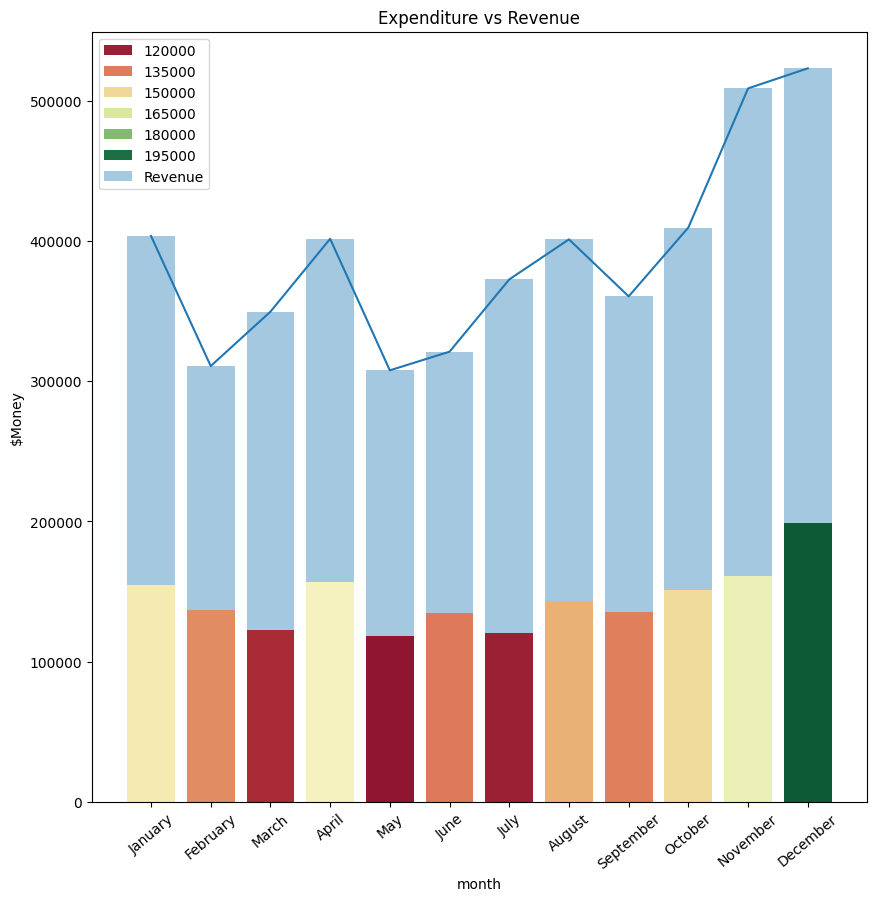

In [55]:
plt.figure(figsize = (10,10))
plt.bar( mdf['month'] , mdf['revenue'] , alpha= 0.4 , label = 'Revenue')
sns.barplot(mdf , x = 'month' , y = 'spend' , hue = 'spend' , palette= 'RdYlGn')
plt.xticks(rotation = 40)
sns.lineplot(mdf , x = 'month' , y = 'revenue' )
plt.ylabel('$Money')
plt.title('Expenditure vs Revenue')
plt.legend()
plt.show()

In [56]:
print(f"Correlation b/w monthly revenue and marketing_expenditure: {mdf['revenue'].corr(mdf['spend'])}")

Correlation b/w monthly revenue and marketing_expenditure: 0.8515025229141345


### Q.9 Evaluate the effectiveness of marketing campaigns by comparing marketing spend to revenue generated. Are there opportunities to reallocate resources for better results?


In [57]:
gdf = marketing.groupby('month').agg({'offline_spend':'sum' , 'online_spend':'sum'})
mdf = pd.merge(monthly_revenue , gdf , on = 'month')
mdf

,month,revenue,mnum,offline_spend,online_spend
0,January,403624.58,1,96600,58328.95
1,February,310819.80,2,81300,55807.92
2,March,349608.09,3,73500,48750.09
3,April,401618.42,4,96000,61026.83
4,May,307763.42,5,65500,52759.64
5,June,321081.38,6,80500,53818.14
6,July,372638.07,7,67500,52717.85
7,August,401210.37,8,85500,57404.15
8,September,360548.40,9,83000,52514.54
9,October,409681.28,10,93500,57724.65


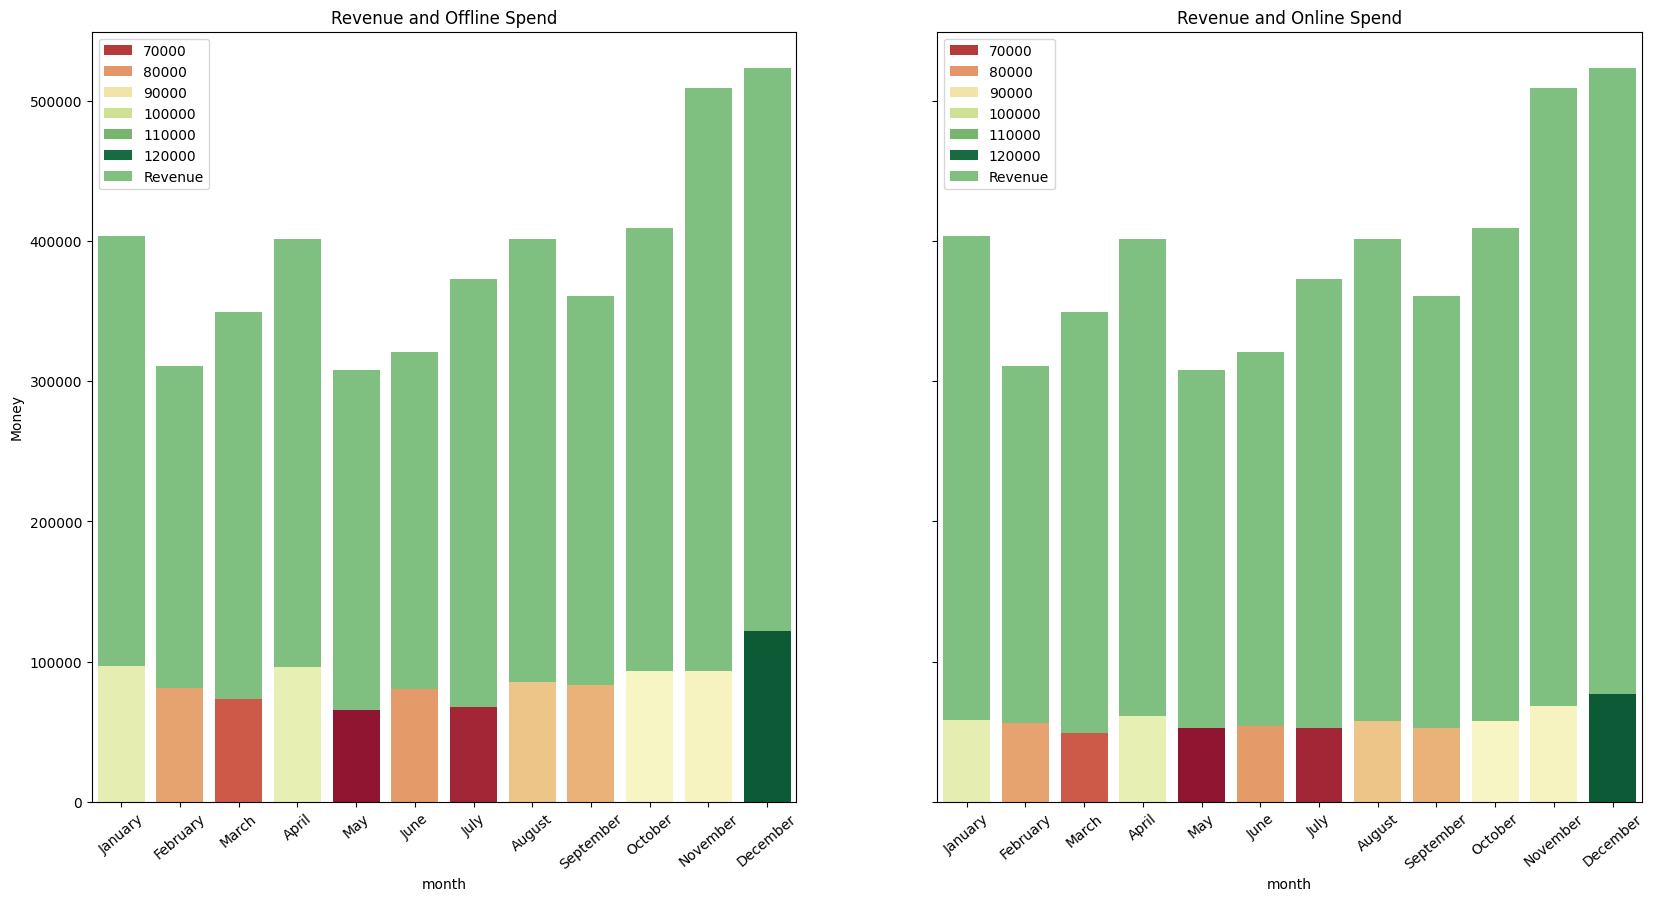

In [58]:
figure , axes = plt.subplots(1,2 , figsize = (20,10) , sharey = True)

plt.sca(axes[0])
plt.title('Revenue and Offline Spend')
plt.bar(mdf['month'] , mdf['revenue'] , alpha = 0.5 , color = 'green' , label = 'Revenue')
sns.barplot(mdf , x = 'month' , y = 'offline_spend' , hue = 'offline_spend' , palette = 'RdYlGn')
plt.ylabel('Money')
plt.legend()
plt.xticks(rotation = 40)

plt.sca(axes[1])
plt.title('Revenue and Online Spend')
plt.bar(mdf['month'] , mdf['revenue'] , alpha = 0.5 , color = 'green' , label = 'Revenue')
sns.barplot(mdf , x = 'month' , y = 'online_spend' , hue = 'offline_spend' , palette = 'RdYlGn')
plt.legend()
plt.xticks(rotation = 40)
plt.show()

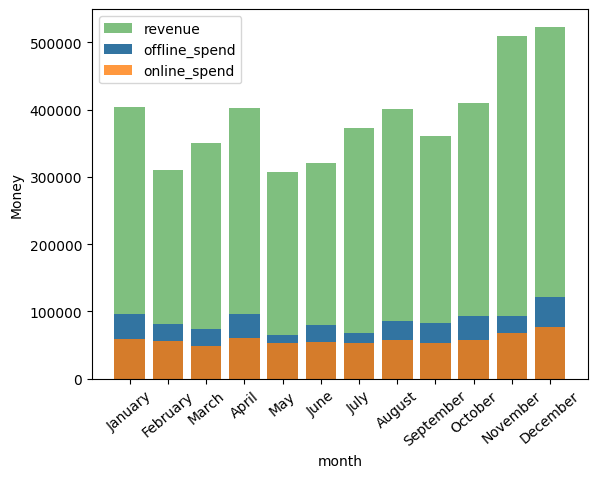

In [59]:
plt.bar(mdf['month'] , mdf['revenue'] , alpha = 0.5, color = 'green' , label = 'revenue')
sns.barplot(mdf , x = 'month' , y = 'offline_spend' , label = 'offline_spend')
plt.bar(mdf['month'] , mdf['online_spend'] , alpha = 0.8 , label = 'online_spend')
plt.legend()
plt.xticks(rotation = 40)
plt.ylabel('Money')
plt.show()

### Q.10 Segment customers into groups such as Premium, Gold, Silver, and Standard. What targeted strategies can be developed for each segment to improve retention and revenue? (Use RFM segmentation techniques)


In [60]:
purchases.head()

,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,mnum,month,revenue
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,1,January,2.05
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,1,January,87.65
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,1,January,16.50


In [61]:
customers = pd.read_excel('./data/CustomersData.xlsx')
customers.columns = [str.lower(column) for column in customers.columns]
customers.head()

,customerid,gender,location,tenure_months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [62]:
mdf = pd.merge(purchases[['transaction_date', 'transaction_id' , 'revenue' , 'customerid']] , customers , on = 'customerid' , how = 'right')
mdf.head()

,transaction_date,transaction_id,revenue,customerid,gender,location,tenure_months
0,2019-01-01,16679,153.71,17850,M,Chicago,12
1,2019-01-01,16680,153.71,17850,M,Chicago,12
2,2019-01-01,16681,2.05,17850,M,Chicago,12
3,2019-01-01,16682,87.65,17850,M,Chicago,12
4,2019-01-01,16682,16.50,17850,M,Chicago,12


In [63]:
reference_date = purchases['transaction_date'].max()
rfm = mdf.groupby('customerid').agg({'transaction_date': lambda x : (reference_date - x.max()).days ,
                               'transaction_id':'count' , 'revenue': 'sum' }).reset_index()

rfm.columns = ['customerid' , 'recency' , 'frequency' , 'monetary']
rfm

,customerid,recency,frequency,monetary
0,12346,107,2,30.99
1,12347,59,60,13834.90
2,12348,73,23,1442.12
3,12350,17,17,1360.07
4,12356,107,36,1442.47
...,...,...,...,...
1463,18259,270,7,544.34
1464,18260,87,40,2363.05
1465,18269,194,8,101.56
1466,18277,69,1,298.00


In [64]:
rfm['r'] = pd.qcut(rfm['recency'], 4, labels=[4, 3, 2, 1]).astype(int)
rfm['f'] = pd.qcut(rfm['frequency'].rank(method = 'first') , 4 , labels = [4,3,2,1]).astype(int)
rfm['m'] = pd.qcut(rfm['monetary'].rank(method = 'first'), 4 , labels = [4,3,2,1]).astype(int)
rfm
rfm

,customerid,recency,frequency,monetary,r,f,m
0,12346,107,2,30.99,3,4,4
1,12347,59,60,13834.90,3,1,1
2,12348,73,23,1442.12,3,2,3
3,12350,17,17,1360.07,4,3,3
4,12356,107,36,1442.47,3,2,3
...,...,...,...,...,...,...,...
1463,18259,270,7,544.34,1,4,4
1464,18260,87,40,2363.05,3,2,2
1465,18269,194,8,101.56,2,4,4
1466,18277,69,1,298.00,3,4,4


In [65]:
rfm['score'] = rfm[['r','f','m']].apply(lambda x: int(str(x['r']) + str(x['f']) + str(x['m'])) , axis = 1)
rfm

,customerid,recency,frequency,monetary,r,f,m,score
0,12346,107,2,30.99,3,4,4,344
1,12347,59,60,13834.90,3,1,1,311
2,12348,73,23,1442.12,3,2,3,323
3,12350,17,17,1360.07,4,3,3,433
4,12356,107,36,1442.47,3,2,3,323
...,...,...,...,...,...,...,...,...
1463,18259,270,7,544.34,1,4,4,144
1464,18260,87,40,2363.05,3,2,2,322
1465,18269,194,8,101.56,2,4,4,244
1466,18277,69,1,298.00,3,4,4,344


In [66]:
def rfm_segment(row):
    r, f, m = row['r'], row['f'], row['m']
    if r >= 3 and f >= 3 and m >= 3:
        return 'Premium'
    elif r >= 2 and f >= 2 and m >= 2:
        return 'Gold'
    elif r in [2, 3] and (f <= 2 or m <= 2):
        return 'Silver'
    else:
        return 'Standard'
    
rfm['segment'] = rfm.apply(rfm_segment, axis = 1)
rfm

,customerid,recency,frequency,monetary,r,f,m,score,segment
0,12346,107,2,30.99,3,4,4,344,Premium
1,12347,59,60,13834.90,3,1,1,311,Silver
2,12348,73,23,1442.12,3,2,3,323,Gold
3,12350,17,17,1360.07,4,3,3,433,Premium
4,12356,107,36,1442.47,3,2,3,323,Gold
...,...,...,...,...,...,...,...,...,...
1463,18259,270,7,544.34,1,4,4,144,Standard
1464,18260,87,40,2363.05,3,2,2,322,Gold
1465,18269,194,8,101.56,2,4,4,244,Gold
1466,18277,69,1,298.00,3,4,4,344,Premium


In [67]:
segments = rfm.groupby('segment').agg({'monetary':'sum' , 'frequency':'max', 'recency':'max'})
segments

,monetary,frequency,recency
segment,,,
Gold,820961.82,45,220
Premium,177770.79,21,131
Silver,1355370.33,695,220
Standard,2316691.68,587,364


<Axes: xlabel='segment', ylabel='monetary'>

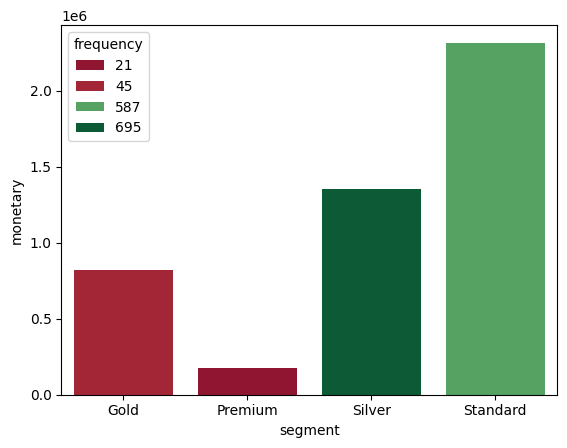

In [68]:
sns.barplot(segments, x = 'segment' , y = 'monetary' , hue = 'frequency', palette= 'RdYlGn')

In [69]:
# get retained customers
first_transactions = purchases.groupby('customerid').agg({'transaction_date':'first'}).reset_index().rename(columns={'transaction_date':'first_transaction'})
recent_transactions = purchases.groupby('customerid').agg({'transaction_date':'last'}).reset_index().rename(columns={'transaction_date':'last_transaction'})
retentions = recent_transactions.merge(first_transactions , on = 'customerid')
retentions

,customerid,last_transaction,first_transaction
0,12346,2019-09-15,2019-09-15
1,12347,2019-11-02,2019-03-24
2,12348,2019-10-19,2019-06-22
3,12350,2019-12-14,2019-12-14
4,12356,2019-09-15,2019-09-15
...,...,...,...
1463,18259,2019-04-05,2019-04-05
1464,18260,2019-10-05,2019-06-22
1465,18269,2019-06-20,2019-04-05
1466,18277,2019-10-23,2019-10-23


In [70]:
retentions['retained'] = retentions.apply(lambda x : x['first_transaction'] != x['last_transaction'], axis = 1)
retentions

,customerid,last_transaction,first_transaction,retained
0,12346,2019-09-15,2019-09-15,False
1,12347,2019-11-02,2019-03-24,True
2,12348,2019-10-19,2019-06-22,True
3,12350,2019-12-14,2019-12-14,False
4,12356,2019-09-15,2019-09-15,False
...,...,...,...,...
1463,18259,2019-04-05,2019-04-05,False
1464,18260,2019-10-05,2019-06-22,True
1465,18269,2019-06-20,2019-04-05,True
1466,18277,2019-10-23,2019-10-23,False


In [71]:
rretentions = rfm.merge(retentions , on= 'customerid')
rretentions

,customerid,recency,frequency,monetary,r,f,m,score,segment,last_transaction,first_transaction,retained
0,12346,107,2,30.99,3,4,4,344,Premium,2019-09-15,2019-09-15,False
1,12347,59,60,13834.90,3,1,1,311,Silver,2019-11-02,2019-03-24,True
2,12348,73,23,1442.12,3,2,3,323,Gold,2019-10-19,2019-06-22,True
3,12350,17,17,1360.07,4,3,3,433,Premium,2019-12-14,2019-12-14,False
4,12356,107,36,1442.47,3,2,3,323,Gold,2019-09-15,2019-09-15,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1463,18259,270,7,544.34,1,4,4,144,Standard,2019-04-05,2019-04-05,False
1464,18260,87,40,2363.05,3,2,2,322,Gold,2019-10-05,2019-06-22,True
1465,18269,194,8,101.56,2,4,4,244,Gold,2019-06-20,2019-04-05,True
1466,18277,69,1,298.00,3,4,4,344,Premium,2019-10-23,2019-10-23,False


In [72]:
segments = rretentions.groupby('segment').agg({'monetary':'sum' , 'frequency':'max', 'recency':'max', 'retained':'count'})
segments

,monetary,frequency,recency,retained
segment,,,,
Gold,820961.82,45,220,497
Premium,177770.79,21,131,247
Silver,1355370.33,695,220,199
Standard,2316691.68,587,364,525


<Axes: xlabel='segment', ylabel='monetary'>

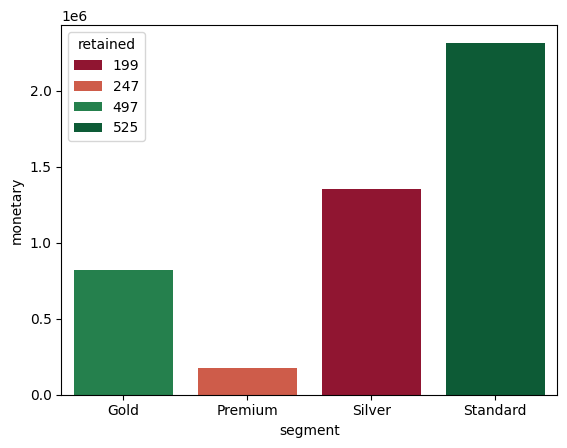

In [73]:
sns.barplot(segments , x = 'segment' , y = 'monetary' , hue = 'retained' , palette='RdYlGn')

### Q.11 Analyze the revenue contribution of each customer segment. How can the company focus its efforts on high-value segments while nurturing lower-value segments?


### Q12.Group customers by their month of first purchase and analyze retention rates over time. Which cohorts exhibit the highest and lowest retention rates? What strategies can be implemented to improve retention for weaker cohorts?


In [74]:
purchases.head()

,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,mnum,month,revenue
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,1,January,2.05
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,1,January,87.65
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,1,January,16.50


In [75]:
tdf = purchases.groupby('customerid').agg({'transaction_date':'first'}).reset_index().rename(columns = {'transaction_date':'first_transaction'})
first_purchases = tdf.merge(purchases, how = 'right' , on = 'customerid')
first_purchases.head()

,customerid,first_transaction,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,mnum,month,revenue
0,17850,2019-01-01,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
1,17850,2019-01-01,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
2,17850,2019-01-01,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,1,January,2.05
3,17850,2019-01-01,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,1,January,87.65
4,17850,2019-01-01,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,1,January,16.50


In [76]:
first_purchases['fmonth'] = first_purchases['first_transaction'].dt.to_period('M')
first_purchases['month'] = first_purchases['transaction_date'].dt.to_period('M')
first_purchases['fmname'] = first_purchases['first_transaction'].dt.month_name()
first_purchases

,customerid,first_transaction,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,mnum,month,revenue,fmonth,fmname
0,17850,2019-01-01,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,1,2019-01,153.71,2019-01,January
1,17850,2019-01-01,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,1,2019-01,153.71,2019-01,January
2,17850,2019-01-01,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,1,2019-01,2.05,2019-01,January
3,17850,2019-01-01,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,1,2019-01,87.65,2019-01,January
4,17850,2019-01-01,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,1,2019-01,16.50,2019-01,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,2019-12-31,48493,2019-12-31,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,12,2019-12,121.30,2019-12,December
52920,14410,2019-12-31,48494,2019-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,12,2019-12,48.92,2019-12,December
52921,14410,2019-12-31,48495,2019-12-31,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,12,2019-12,151.88,2019-12,December
52922,14600,2019-12-31,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,12,2019-12,402.60,2019-12,December


In [77]:
crepeated_purchases = first_purchases[first_purchases['first_transaction'] != first_purchases['transaction_date']]
crepeated_purchases.iloc[3000,:]

customerid                                             12748
first_transaction                        2019-01-08 00:00:00
transaction_id                                         23942
transaction_date                         2019-03-23 00:00:00
product_sku                                   GGOEAFKQ020599
product_description    Android Sticker Sheet Ultra Removable
product_category                                      Office
quantity                                                   1
avg_price                                               2.99
delivery_charges                                         6.5
coupon_status                                       Not Used
mnum                                                       3
month                                                2019-03
revenue                                                 2.99
fmonth                                               2019-01
fmname                                               January
Name: 10606, dtype: obje

[]

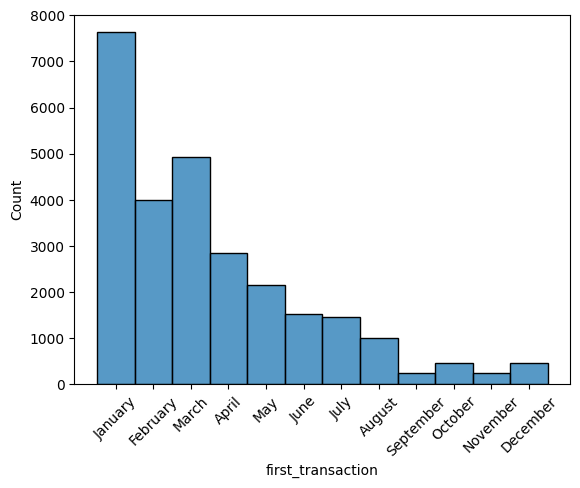

In [78]:
sns.histplot(crepeated_purchases , x = crepeated_purchases['first_transaction'].dt.month_name())
plt.xticks(rotation = 45)
plt.plot()

In [79]:
gdf = first_purchases.groupby(['fmonth' , 'month']).agg({'customerid':'nunique'}).reset_index()
gdf

,fmonth,month,customerid
0,2019-01,2019-01,215
1,2019-01,2019-02,13
2,2019-01,2019-03,24
3,2019-01,2019-04,34
4,2019-01,2019-05,23
...,...,...,...
73,2019-10,2019-11,6
74,2019-10,2019-12,4
75,2019-11,2019-11,68
76,2019-11,2019-12,7


In [80]:
rtable = gdf.pivot(index = 'fmonth' , columns = 'month' , values = 'customerid')
rtable

month,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
fmonth,,,,,,,,,,,,
2019-01,215.0,13.0,24.0,34.0,23.0,44.0,35.0,47.0,23.0,28.0,20.0,34.0
2019-02,NaN,96.0,7.0,9.0,16.0,17.0,22.0,19.0,15.0,12.0,11.0,16.0
2019-03,NaN,NaN,177.0,18.0,35.0,25.0,32.0,33.0,22.0,22.0,15.0,19.0
2019-04,NaN,NaN,NaN,163.0,14.0,24.0,24.0,18.0,15.0,10.0,16.0,12.0
2019-05,NaN,NaN,NaN,NaN,112.0,12.0,9.0,13.0,10.0,13.0,14.0,8.0
2019-06,NaN,NaN,NaN,NaN,NaN,137.0,20.0,22.0,12.0,11.0,14.0,11.0
2019-07,NaN,NaN,NaN,NaN,NaN,NaN,94.0,13.0,4.0,6.0,11.0,9.0
2019-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135.0,14.0,15.0,10.0,8.0
2019-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,6.0,3.0,2.0


In [81]:
cohortsize = rtable.to_numpy().diagonal()
# rtable.divide(cohortsize).round(3)
cohortsize
rrates = rtable.divide(cohortsize).round(3)
rrates

month,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
fmonth,,,,,,,,,,,,
2019-01,1.0,0.135,0.136,0.209,0.205,0.321,0.372,0.348,0.295,0.322,0.294,0.321
2019-02,NaN,1.000,0.040,0.055,0.143,0.124,0.234,0.141,0.192,0.138,0.162,0.151
2019-03,NaN,NaN,1.000,0.110,0.312,0.182,0.340,0.244,0.282,0.253,0.221,0.179
2019-04,NaN,NaN,NaN,1.000,0.125,0.175,0.255,0.133,0.192,0.115,0.235,0.113
2019-05,NaN,NaN,NaN,NaN,1.000,0.088,0.096,0.096,0.128,0.149,0.206,0.075
2019-06,NaN,NaN,NaN,NaN,NaN,1.000,0.213,0.163,0.154,0.126,0.206,0.104
2019-07,NaN,NaN,NaN,NaN,NaN,NaN,1.000,0.096,0.051,0.069,0.162,0.085
2019-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,0.179,0.172,0.147,0.075
2019-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,0.069,0.044,0.019


<Axes: xlabel='month', ylabel='fmonth'>

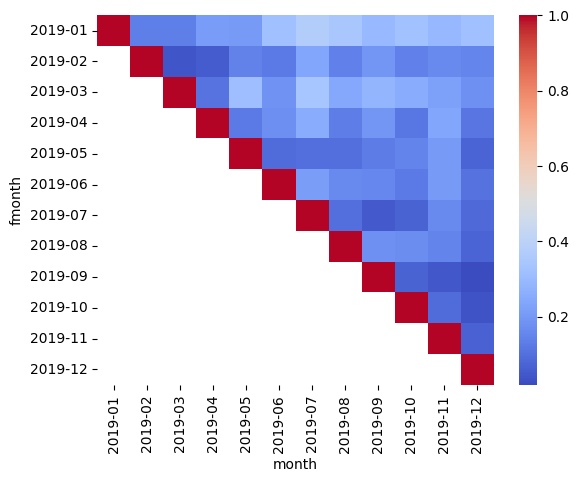

In [82]:
sns.heatmap(rrates , cmap = 'coolwarm')

### Q.13 Analyze the lifetime value of customers acquired in different months. How can this insight inform acquisition and retention strategies?


In [83]:
# first_purchases.groupby('month').agg({'revenue':'sum'})
customervalue = purchases.groupby('customerid').agg({'revenue':'sum'}).reset_index()
mdf = customervalue.merge(first_transactions , on = 'customerid')
mdf

,customerid,revenue,first_transaction
0,12346,30.99,2019-09-15
1,12347,13834.90,2019-03-24
2,12348,1442.12,2019-06-22
3,12350,1360.07,2019-12-14
4,12356,1442.47,2019-09-15
...,...,...,...
1463,18259,544.34,2019-04-05
1464,18260,2363.05,2019-06-22
1465,18269,101.56,2019-04-05
1466,18277,298.00,2019-10-23


In [84]:
mdf['month'] = mdf['first_transaction'].dt.month_name()
mdf

,customerid,revenue,first_transaction,month
0,12346,30.99,2019-09-15,September
1,12347,13834.90,2019-03-24,March
2,12348,1442.12,2019-06-22,June
3,12350,1360.07,2019-12-14,December
4,12356,1442.47,2019-09-15,September
...,...,...,...,...
1463,18259,544.34,2019-04-05,April
1464,18260,2363.05,2019-06-22,June
1465,18269,101.56,2019-04-05,April
1466,18277,298.00,2019-10-23,October


In [85]:
gdf = mdf.groupby('month').agg({'revenue':'sum' , 'first_transaction':'first'}).reset_index()
gdf['mnum'] = gdf['first_transaction'].dt.month
gdf.sort_values(by = 'mnum' , inplace = True)
gdf

,month,revenue,first_transaction,mnum
4,January,1037320.06,2019-01-02,1
3,February,540338.52,2019-02-09,2
7,March,668895.39,2019-03-24,3
0,April,449331.26,2019-04-13,4
8,May,332698.60,2019-05-26,5
6,June,292800.81,2019-06-22,6
5,July,240255.54,2019-07-05,7
1,August,259011.87,2019-08-23,8
11,September,151664.24,2019-09-15,9
10,October,229976.73,2019-10-16,10


[]

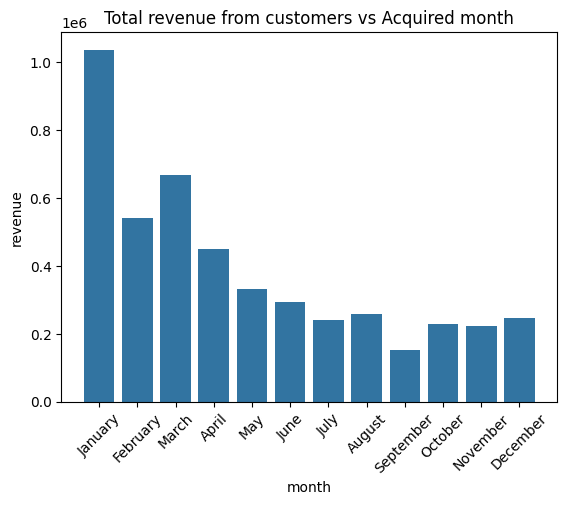

In [86]:
sns.barplot(gdf , x = 'month' , y = 'revenue')
plt.xticks(rotation = 45)
plt.title('Total revenue from customers vs Acquired month')
plt.plot()

### Q.14 Do customers who use coupons have a different average transaction value compared to those who do not?

Conduct a statistical test to validate this hypothesis. What implications does this have for the company’s discount and coupon strategies?


In [87]:
# import a library to perform a Z-test
from statsmodels.stats import weightstats as stests
from scipy import stats
from scipy.stats import ttest_ind

In [88]:
crevenue = purchases[['customerid' , 'transaction_id' , 'revenue' , 'coupon_status']]
crevenue = crevenue[(crevenue['coupon_status'] == 'Used') | (crevenue['coupon_status'] == 'Not Used')]
crevenue

,customerid,transaction_id,revenue,coupon_status
0,17850,16679,153.71,Used
1,17850,16680,153.71,Used
2,17850,16681,2.05,Used
3,17850,16682,87.65,Not Used
4,17850,16682,16.50,Used
...,...,...,...,...
52911,15781,48489,3.47,Used
52912,15781,48489,16.30,Used
52915,14410,48491,121.30,Not Used
52920,14410,48494,48.92,Used


In [89]:
gdf = crevenue.groupby('coupon_status').agg({'revenue':'mean'}).reset_index()
gdf

,coupon_status,revenue
0,Not Used,90.525064
1,Used,87.177061


In [90]:
used = crevenue[crevenue['coupon_status'] == 'Used']['revenue']
nused = crevenue[crevenue['coupon_status'] == 'Not Used']['revenue']

In [91]:
used.head()

0    153.71
1    153.71
2      2.05
4     16.50
5     77.25
Name: revenue, dtype: float64

In [92]:
tstat , pval = ttest_ind(used , nused , equal_var= False , nan_policy='omit')

umean = used.mean()
nmean = nused.mean()
umean , nmean , tstat , pval

(np.float64(87.17706099195709),
 np.float64(90.52506424511984),
 np.float64(-1.4439282591724714),
 np.float64(0.14877930359947447))

### Q.15 Do purchase behaviors (e.g., order frequency, order value) vary significantly across different demographic groups or pricing factors (e.g., delivery charges)?

    Test for differences in purchase behavior across locations, age groups, or delivery charge tiers. How can these insights inform personalized marketing and pricing strategies?


    1.across locatoins


In [93]:
purchases.head()

,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,mnum,month,revenue
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,1,January,2.05
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,1,January,87.65
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,1,January,16.50


In [94]:
customers.head()

,customerid,gender,location,tenure_months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [95]:
mdf = customers.merge(purchases , how = 'right' , on = 'customerid')
mdf.head()

,customerid,gender,location,tenure_months,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,mnum,month,revenue
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
1,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
2,17850,M,Chicago,12,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,1,January,2.05
3,17850,M,Chicago,12,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,1,January,87.65
4,17850,M,Chicago,12,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,1,January,16.50


In [96]:
locations = mdf.groupby('location').agg({'revenue':lambda x : np.mean(x).round(2) , 'transaction_id':'count'}).rename(columns = {'transaction_id':'transactions'}).reset_index()
cities = locations['location'].unique()
locations , cities

(        location  revenue  transactions
 0     California    89.39         16136
 1        Chicago    88.46         18380
 2     New Jersey    90.98          4503
 3       New York    83.86         11173
 4  Washington DC    93.62          2732,
 array(['California', 'Chicago', 'New Jersey', 'New York', 'Washington DC'],
       dtype=object))

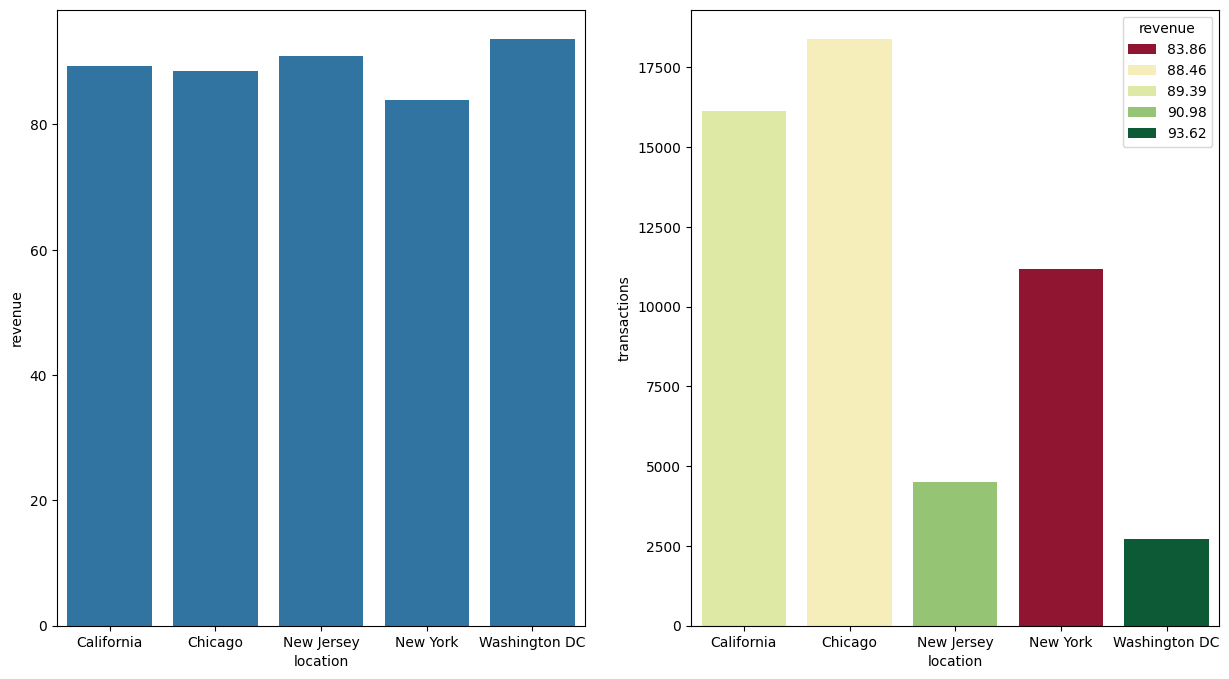

In [98]:
figure , axes = plt.subplots(1,2 , figsize = ( 15 , 8))
plt.sca(axes[0])
sns.barplot(locations , x = 'location' , y = 'revenue')
plt.sca(axes[1])
sns.barplot(locations , x = 'location' , y = 'transactions' , hue = 'revenue' , palette = 'RdYlGn')
plt.show()

In [99]:
#perform annova for avg transaction price in different locaitons:
#   ho: the mean avg transaction price for each location is similar
#   h1: they are different
# alpha = 0.05

In [100]:
clist = [mdf[mdf['location'] == city]['revenue'] for city in cities]
stats.f_oneway(clist[0] , clist[1] , clist[2] , clist[3] , clist[4] )

F_onewayResult(statistic=np.float64(3.2449582892340105), pvalue=np.float64(0.011381390904730159))

In [101]:
#Analyse delivery charge tiers:
mdf['dtier'] = pd.qcut(mdf['delivery_charges'] , q = 3 , labels=['low' , 'mid' , 'high'])
mdf.head()

,customerid,gender,location,tenure_months,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,mnum,month,revenue,dtier
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71,mid
1,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71,mid
2,17850,M,Chicago,12,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,1,January,2.05,mid
3,17850,M,Chicago,12,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,1,January,87.65,mid
4,17850,M,Chicago,12,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,1,January,16.50,mid


In [102]:
dtier = mdf.groupby('dtier').agg({'revenue':lambda x: np.mean(x).round(2) , 'transaction_id':'count'}).reset_index().rename(columns={'transaction_id':'transactions'})
dtier

/var/folders/5f/scjcfk_97_n7zmjltnpm2mjc0000gn/T/ipykernel_9877/2140648042.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dtier = mdf.groupby('dtier').agg({'revenue':lambda x: np.mean(x).round(2) , 'transaction_id':'count'}).reset_index().rename(columns={'transaction_id':'transactions'})


,dtier,revenue,transactions
0,low,77.72,26963
1,mid,101.82,15862
2,high,95.09,10099


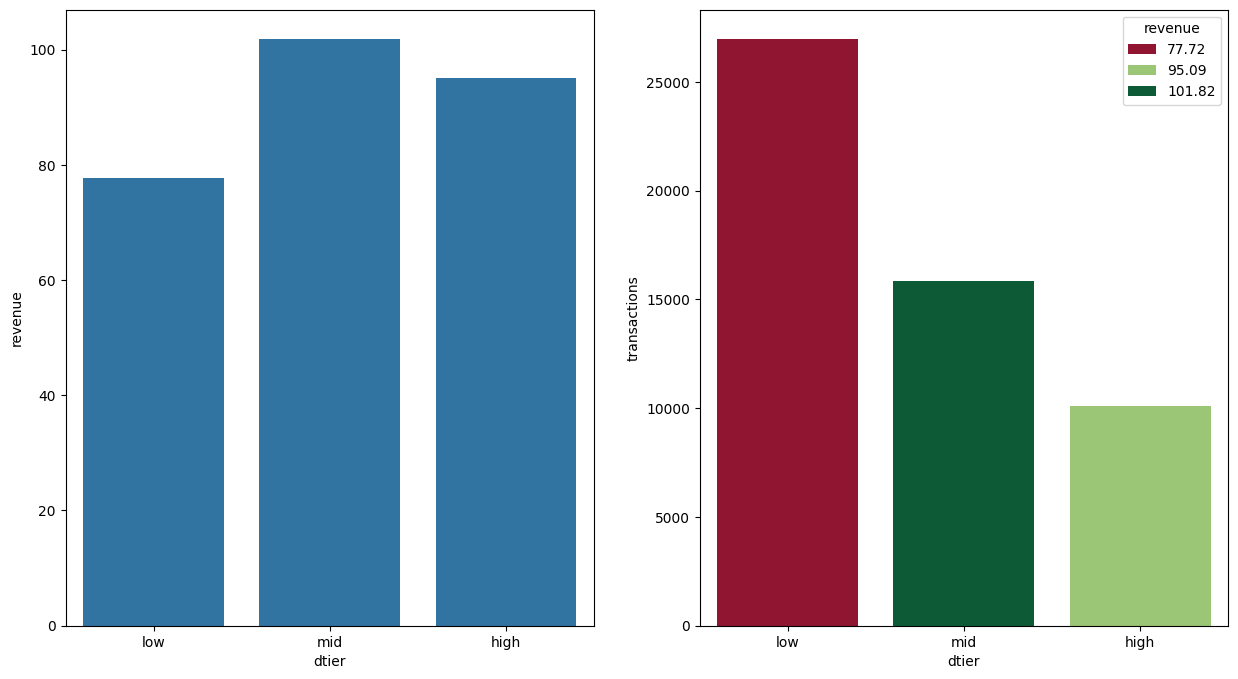

In [103]:
figure , axes = plt.subplots(1,2 , figsize = ( 15 , 8))
plt.sca(axes[0])
sns.barplot(dtier , x = 'dtier' , y = 'revenue')
plt.sca(axes[1])
sns.barplot(dtier , x = 'dtier' , y = 'transactions' , hue = 'revenue' , palette = 'RdYlGn')
plt.show()

In [ ]:
dlist = [mdf[mdf['dtier'] == cat]['revenue'] for cat in ['low' , 'mid' , 'high']]
stats.f_oneway(dlist[0] , dlist[1])

F_onewayResult(statistic=np.float64(212.59502007758172), pvalue=np.float64(4.8641723376862866e-48))

In [105]:
#location and delivery tier combined:
table = mdf.groupby(['location' , 'dtier']).agg({'revenue':lambda x : x.mean().round(2)}).unstack()
table.reset_index()

/var/folders/5f/scjcfk_97_n7zmjltnpm2mjc0000gn/T/ipykernel_9877/3374417007.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  table = mdf.groupby(['location' , 'dtier']).agg({'revenue':lambda x : x.mean().round(2)}).unstack()


location revenue               
dtier                    low     mid   high
0         California   79.61  100.43  97.69
1            Chicago   79.32   98.72  96.64
2         New Jersey   77.51  114.56  91.02
3           New York   72.14   98.97  92.65
4      Washington DC   79.57  118.34  83.02

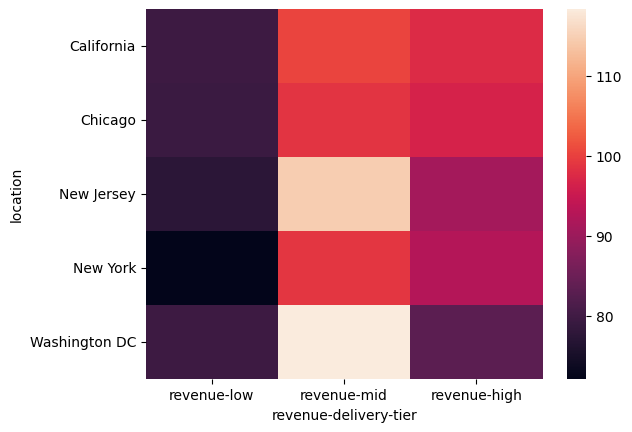

In [107]:
sns.heatmap(table)
plt.xlabel('revenue-delivery-tier')
plt.show()

### Q.16 Does customer tenure impact purchase frequency?

    Analyze the relationship between customer tenure and purchase frequency. How can this insight be used to improve customer engagement and retention strategies?


In [108]:
customers

,customerid,gender,location,tenure_months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49
...,...,...,...,...
1463,14438,F,New York,41
1464,12956,F,Chicago,48
1465,15781,M,New Jersey,19
1466,14410,F,New York,45


In [109]:
pcounts = purchases.groupby('customerid').agg({'transaction_id':'count'}).reset_index().rename(columns={'transaction_id':'pfreq'})
pcounts

,customerid,pfreq
0,12346,2
1,12347,60
2,12348,23
3,12350,17
4,12356,36
...,...,...
1463,18259,7
1464,18260,40
1465,18269,8
1466,18277,1


In [110]:
mdf = pcounts.merge(customers[['customerid', 'tenure_months']] , on = 'customerid')
mdf

,customerid,pfreq,tenure_months
0,12346,2,31
1,12347,60,20
2,12348,23,39
3,12350,17,25
4,12356,36,31
...,...,...,...
1463,18259,7,5
1464,18260,40,43
1465,18269,8,25
1466,18277,1,47


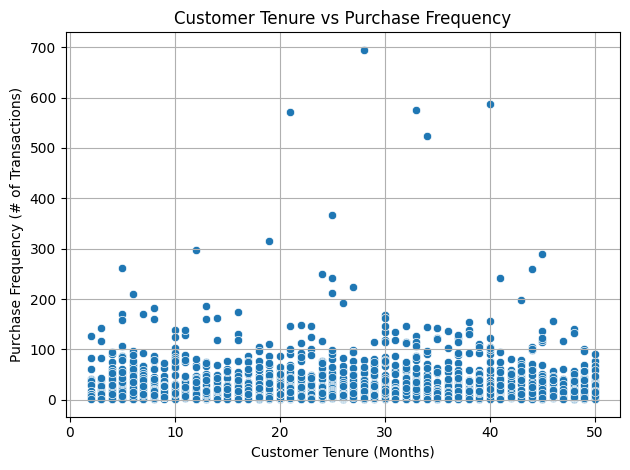

In [111]:
sns.scatterplot(mdf , x= 'tenure_months' , y = 'pfreq')
plt.title('Customer Tenure vs Purchase Frequency')
plt.xlabel('Customer Tenure (Months)')
plt.ylabel('Purchase Frequency (# of Transactions)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [112]:
mdf['tenure_months'].corr(mdf['pfreq']).round(3)


np.float64(0.011)

### Q.17 Analyze the relationship between delivery charges and order behavior.

    Are there opportunities to optimize delivery pricing to increase order quantities or revenue?


In [113]:
purchases['dtier'] = pd.qcut(purchases['delivery_charges'] , q = 3 , labels = ['low' , 'mid' , 'high'])
purchases.head()

,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,mnum,month,revenue,dtier
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71,mid
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71,mid
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,1,January,2.05,mid
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,1,January,87.65,mid
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,1,January,16.50,mid


In [114]:
dtier = purchases.groupby('dtier').agg({'transaction_id' : 'count' , 'revenue':'mean' , 'quantity':'mean'}).reset_index()
dtier.rename(columns = {'transaction_id':'freq' , 'revenue':'avg revenue', 'quantity':'avg quantity'} , inplace = True)
dtier

/var/folders/5f/scjcfk_97_n7zmjltnpm2mjc0000gn/T/ipykernel_9877/693315051.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dtier = purchases.groupby('dtier').agg({'transaction_id' : 'count' , 'revenue':'mean' , 'quantity':'mean'}).reset_index()


,dtier,freq,avg revenue,avg quantity
0,low,26963,77.716060,2.971183
1,mid,15862,101.817094,3.427563
2,high,10099,95.089983,10.253788


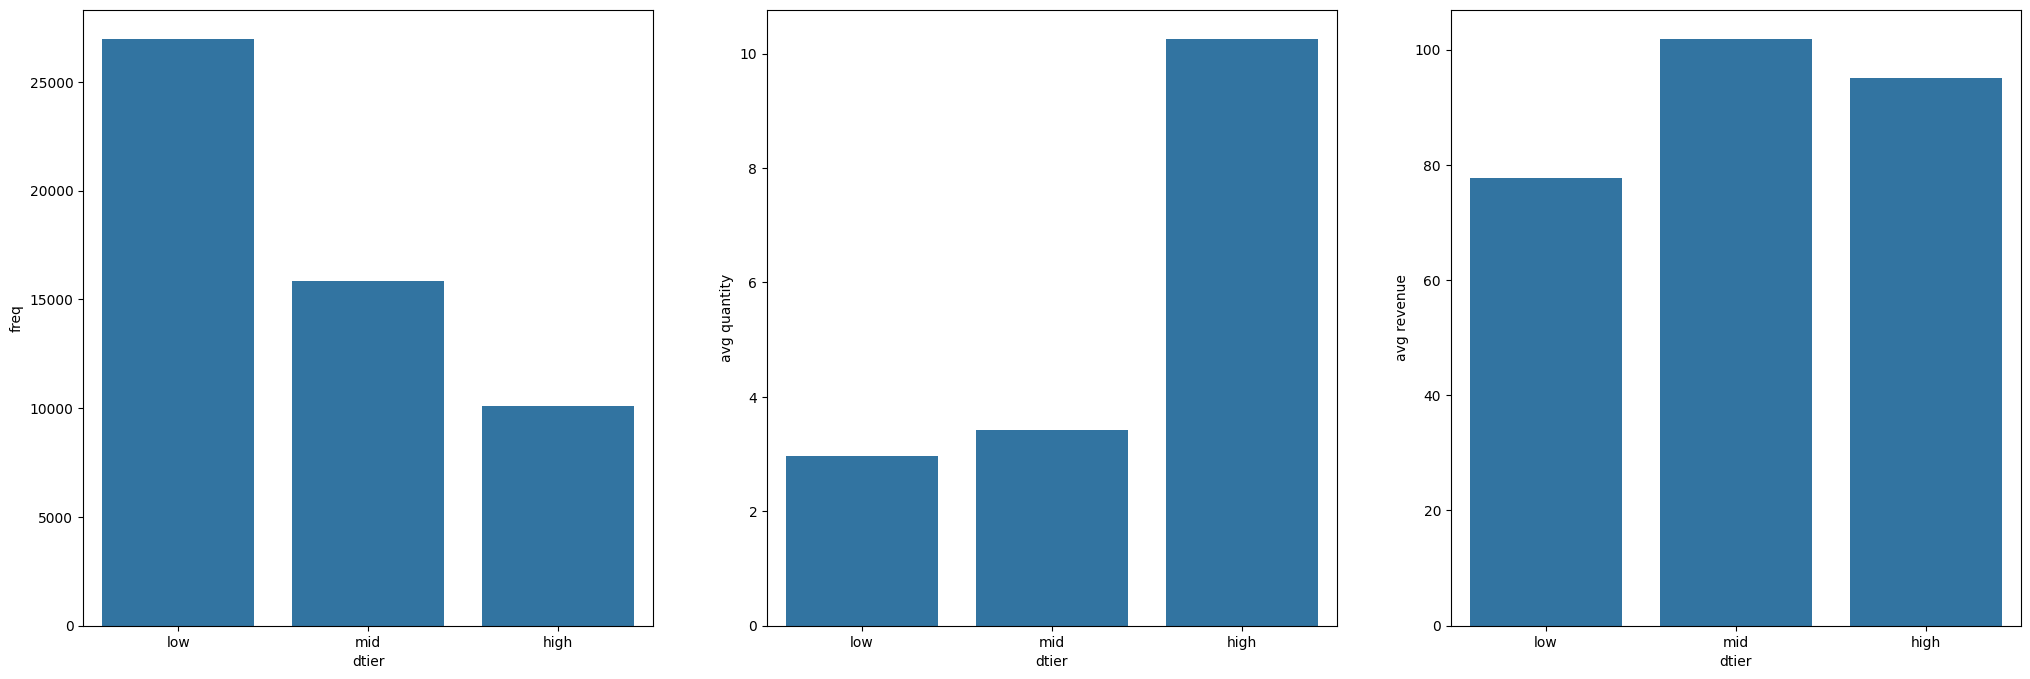

In [115]:
fig , axes = plt.subplots(1,3 , figsize = (25,8))
plt.sca(axes[0])
sns.barplot(dtier , x = 'dtier' , y = 'freq')
plt.sca(axes[1])
sns.barplot(dtier , x = 'dtier' , y = 'avg quantity')
plt.sca(axes[2])
sns.barplot(dtier , x = 'dtier' , y = 'avg revenue')
plt.show()

### Q18. Evaluate how taxes and delivery charges influence customer spending behavior. Are there opportunities to adjust pricing strategies to improve customer satisfaction and revenue?


In [116]:
tax = pd.read_excel('./data/Tax_amount.xlsx')
tax.columns = [str.lower(column) for column in tax.columns]
tax.head()

,product_category,gst
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


In [172]:
taxm = tax.merge(purchases , on = 'product_category' , how = 'right')
taxm.head()

,product_category,gst,customerid,transaction_id,transaction_date,product_sku,product_description,quantity,avg_price,delivery_charges,coupon_status,mnum,month,revenue,dtier
0,Nest-USA,0.10,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,1,153.71,6.5,Used,1,January,153.71,mid
1,Nest-USA,0.10,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,1,153.71,6.5,Used,1,January,153.71,mid
2,Office,0.10,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,1,2.05,6.5,Used,1,January,2.05,mid
3,Apparel,0.18,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,5,17.53,6.5,Not Used,1,January,87.65,mid
4,Bags,0.18,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,1,16.50,6.5,Used,1,January,16.50,mid


In [118]:
taxm['ttier'] = pd.qcut(taxm['gst'] , q = 3 , duplicates= 'drop', labels = ['low' , 'high'])
taxm.head()

,product_category,gst,customerid,transaction_id,transaction_date,product_sku,product_description,quantity,avg_price,delivery_charges,coupon_status,mnum,month,revenue,dtier,ttier
0,Nest-USA,0.10,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,1,153.71,6.5,Used,1,January,153.71,mid,low
1,Nest-USA,0.10,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,1,153.71,6.5,Used,1,January,153.71,mid,low
2,Office,0.10,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,1,2.05,6.5,Used,1,January,2.05,mid,low
3,Apparel,0.18,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,5,17.53,6.5,Not Used,1,January,87.65,mid,high
4,Bags,0.18,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,1,16.50,6.5,Used,1,January,16.50,mid,high


In [119]:
#revenue by tax tier:
gdf = taxm.groupby('ttier').agg({'revenue':'sum' , 'transaction_id':'count'}).reset_index().rename(columns = {'transaction_id':'freq'})
gdf

/var/folders/5f/scjcfk_97_n7zmjltnpm2mjc0000gn/T/ipykernel_9877/3231772372.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gdf = taxm.groupby('ttier').agg({'revenue':'sum' , 'transaction_id':'count'}).reset_index().rename(columns = {'transaction_id':'freq'})


,ttier,revenue,freq
0,low,3633315.63,25459
1,high,1037478.99,27465


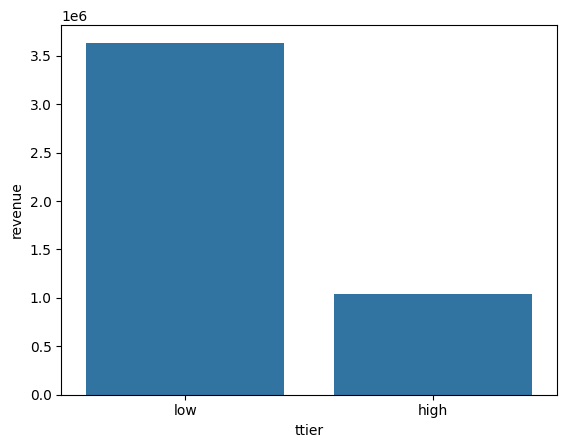

In [120]:
sns.barplot(gdf , x = 'ttier' , y = 'revenue')
plt.show()

/var/folders/5f/scjcfk_97_n7zmjltnpm2mjc0000gn/T/ipykernel_9877/282412886.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  table = taxm.groupby(['ttier', 'dtier']).agg({'revenue':lambda x : x.mean().round(3)}).unstack()


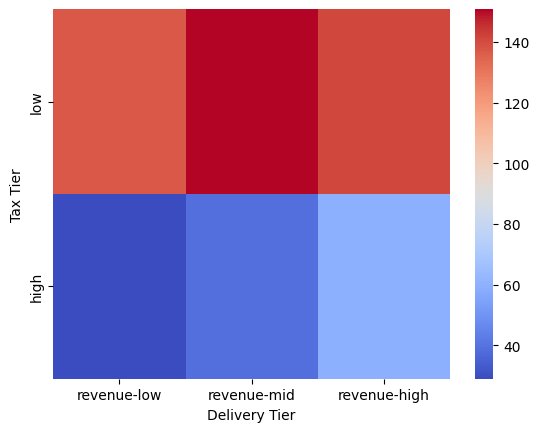

In [123]:
#combining both delivery tier and tax tier:
table = taxm.groupby(['ttier', 'dtier']).agg({'revenue':lambda x : x.mean().round(3)}).unstack()
sns.heatmap(table , cmap = 'coolwarm')
plt.xlabel('Delivery Tier')
plt.ylabel('Tax Tier')
plt.show()

### Q.19 Identify seasonal trends in sales by category and location. How can the company prepare for peak and off-peak seasons to maximize revenue?


In [133]:
taxm['mperiod'] = df['transaction_date'].dt.to_period('M')
taxm.head()

,product_category,gst,customerid,transaction_id,transaction_date,product_sku,product_description,quantity,avg_price,delivery_charges,coupon_status,mnum,month,revenue,dtier,ttier,mperiod
0,Nest-USA,0.10,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,1,153.71,6.5,Used,1,January,153.71,mid,low,2019-01
1,Nest-USA,0.10,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,1,153.71,6.5,Used,1,January,153.71,mid,low,2019-01
2,Office,0.10,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,1,2.05,6.5,Used,1,January,2.05,mid,low,2019-01
3,Apparel,0.18,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,5,17.53,6.5,Not Used,1,January,87.65,mid,high,2019-01
4,Bags,0.18,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,1,16.50,6.5,Used,1,January,16.50,mid,high,2019-01


In [143]:
#seasional trend in product-categories:
# taxm.head()
table = taxm.groupby(['product_category' , 'mperiod']).agg({'revenue':'sum'}).unstack()
table.fillna(0 , inplace = True)

In [171]:
#seasional trend by locations:
mdf = customers.merge(taxm , on = 'customerid' , how = 'right')
mdf.head()

,customerid,gender,location,tenure_months,product_category,gst,transaction_id,transaction_date,product_sku,product_description,quantity,avg_price,delivery_charges,coupon_status,mnum,month,revenue,dtier,ttier,mperiod
0,17850,M,Chicago,12,Nest-USA,0.10,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,1,153.71,6.5,Used,1,January,153.71,mid,low,2019-01
1,17850,M,Chicago,12,Nest-USA,0.10,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,1,153.71,6.5,Used,1,January,153.71,mid,low,2019-01
2,17850,M,Chicago,12,Office,0.10,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,1,2.05,6.5,Used,1,January,2.05,mid,low,2019-01
3,17850,M,Chicago,12,Apparel,0.18,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,5,17.53,6.5,Not Used,1,January,87.65,mid,high,2019-01
4,17850,M,Chicago,12,Bags,0.18,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,1,16.50,6.5,Used,1,January,16.50,mid,high,2019-01


In [157]:
locationTable = mdf.groupby(['location', 'mperiod']).agg({'revenue':'sum'}).unstack()
locationTable.fillna( 0 , inplace = True)

Text(0.5, 80.7222222222222, 'Month')

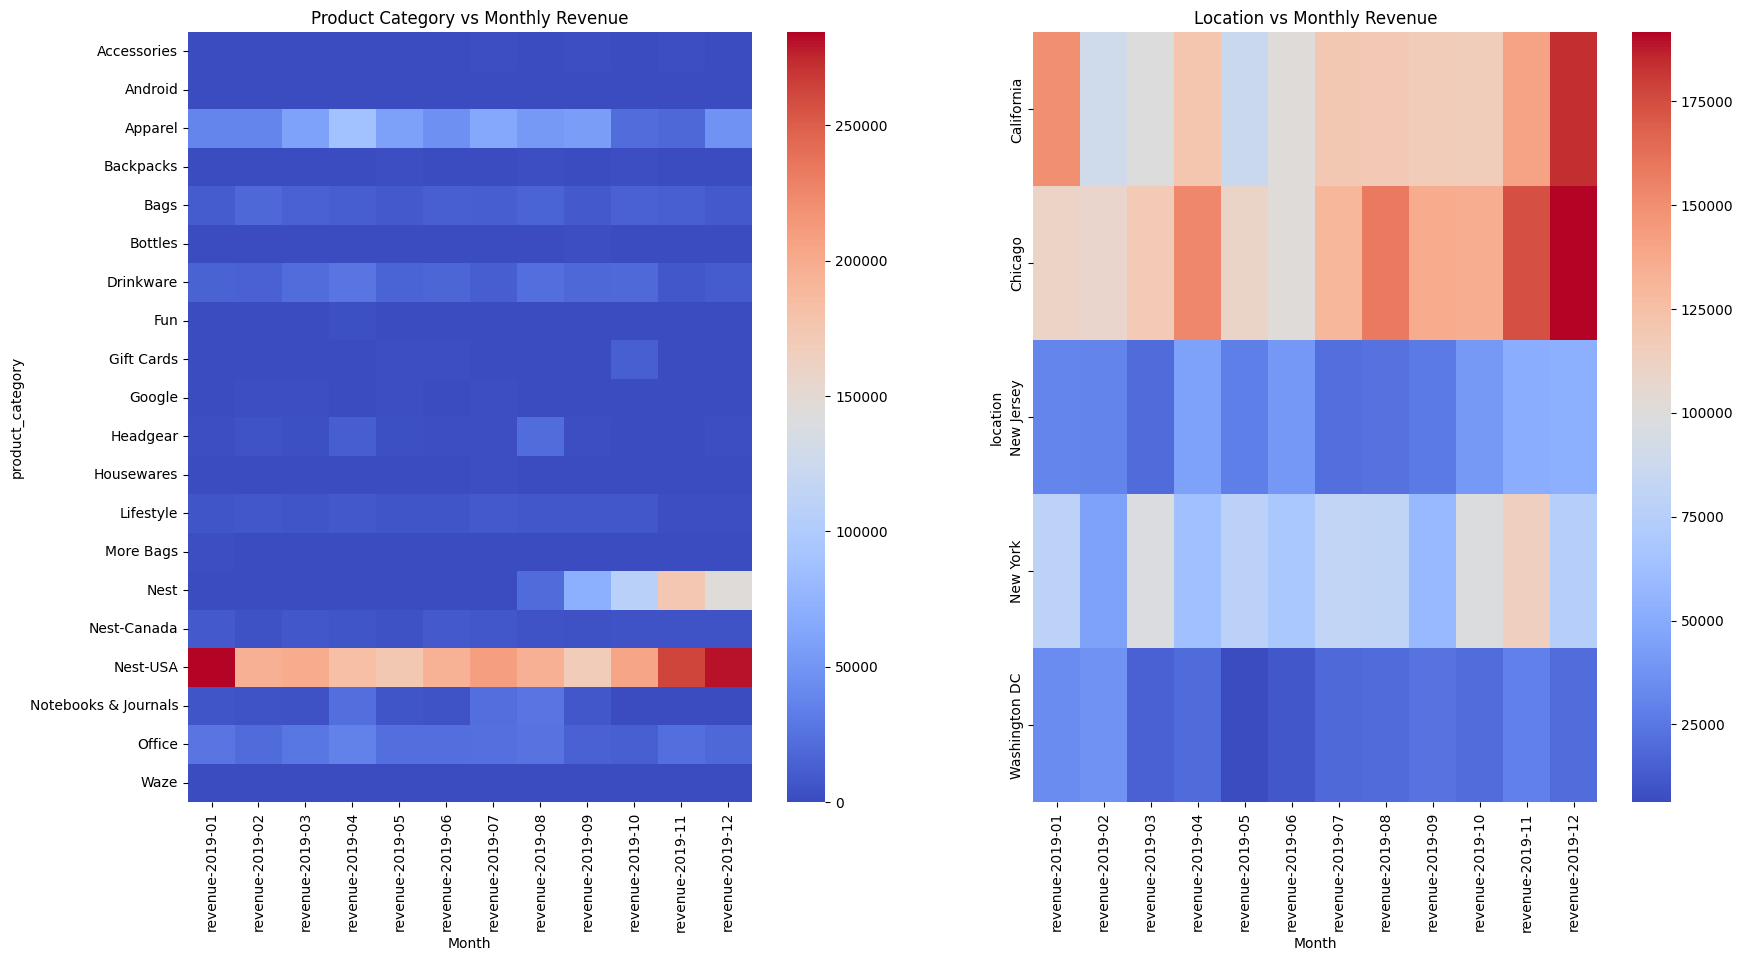

In [160]:
fig , axes = plt.subplots(1, 2, figsize = (20,10))
plt.sca(axes[0])
sns.heatmap(table , cmap = 'coolwarm')
plt.title('Product Category vs Monthly Revenue')
plt.xlabel('Month')

plt.sca(axes[1])
plt.title('Location vs Monthly Revenue')
sns.heatmap(locationTable , cmap = 'coolwarm')
plt.xlabel('Month')

### Q.20 Analyze daily sales trends to identify high-performing and low-performing days. What strategies can be implemented to boost sales on slower days?


In [167]:
daily = taxm.groupby('transaction_date').agg({'revenue':'sum'}).reset_index().sort_values(by = 'transaction_date')
daily

,transaction_date,revenue
0,2019-01-01,7380.49
1,2019-01-02,13438.47
2,2019-01-03,23834.21
3,2019-01-04,16603.41
4,2019-01-05,17373.19
...,...,...
360,2019-12-27,13661.59
361,2019-12-28,10994.42
362,2019-12-29,12011.27
363,2019-12-30,8068.47


<Axes: xlabel='transaction_date', ylabel='revenue'>

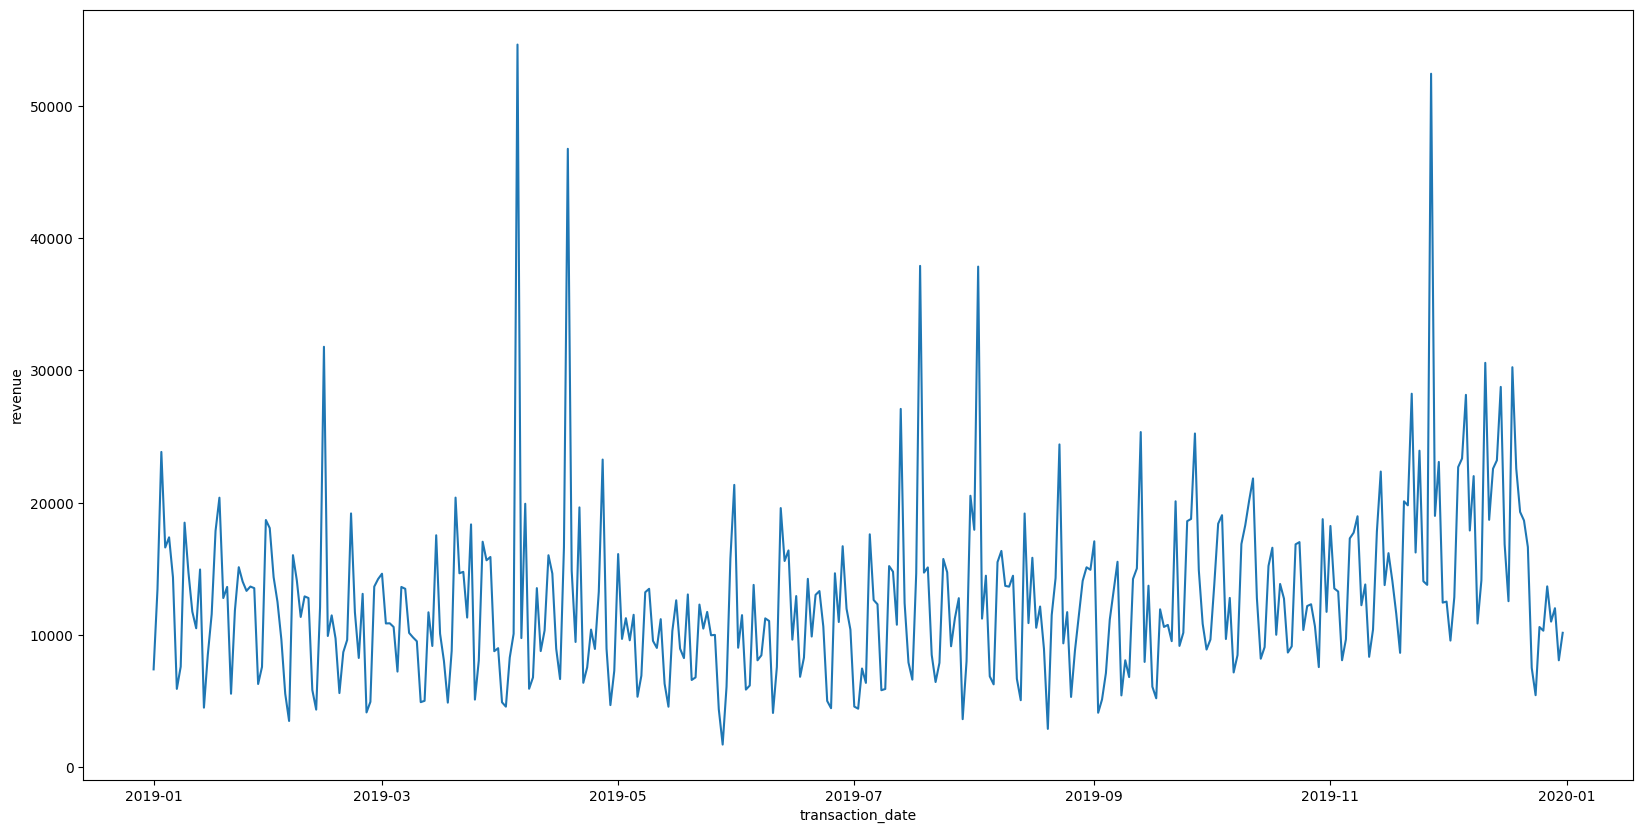

In [170]:
plt.figure(figsize = (20,10))
sns.lineplot(daily , x = 'transaction_date' , y = 'revenue')